In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

data = pd.read_csv('March_Madness.csv')

data['Is_32'] = data['FINISH'].apply(lambda x: 1 if x != 'R64' else 0)
data['W%'] = data['WINS'] / data['G']
data['W%'] = data['W%'].round(3)
winner = data[data['Is_32'] == 1]
loser = data[data['Is_32'] == 0]


def bootstrap_mean(data, n_bootstrap=10000):
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    return bootstrap_means

data.columns

Index(['Unnamed: 0', 'YEAR', 'TEAM', 'CONF', 'G', 'REC', 'ADJOE', 'ADJDE',
       'EFG%', 'EFGD%', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P%',
       '2P%D', '3P%', '3P%D', '3PR', '3PRD', 'ADJ T.', 'WAB', 'SEED', 'FINISH',
       'WINS', 'LOSSES', 'Is_32', 'W%'],
      dtype='object')

### Bootstrap ADJOE

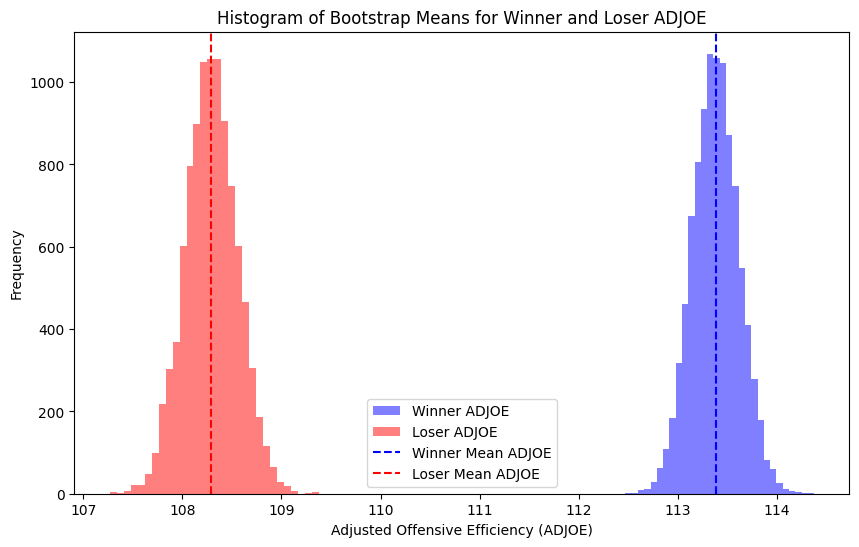

Winner ADJOE 95% CI: [112.9289375  113.84458854]
Loser ADJOE 95% CI: [107.78083333 108.8085625 ]


In [42]:
# Plotting the histograms
# Bootstrap for winner and loser ADJOE
winner_means = bootstrap_mean(winner['ADJOE'])
loser_means = bootstrap_mean(loser['ADJOE'])

# Confidence intervals
winner_ci = np.percentile(winner_means, [2.5, 97.5])
loser_ci = np.percentile(loser_means, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means, bins=30, alpha=0.5, label='Winner ADJOE', color='blue')
plt.hist(loser_means, bins=30, alpha=0.5, label='Loser ADJOE', color='red')
plt.axvline(np.mean(winner_means), color='blue', linestyle='--', label='Winner Mean ADJOE')
plt.axvline(np.mean(loser_means), color='red', linestyle='--', label='Loser Mean ADJOE')
plt.title('Histogram of Bootstrap Means for Winner and Loser ADJOE')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner ADJOE 95% CI:', winner_ci)
print('Loser ADJOE 95% CI:', loser_ci)

### Hypothesis Testing ADJOE

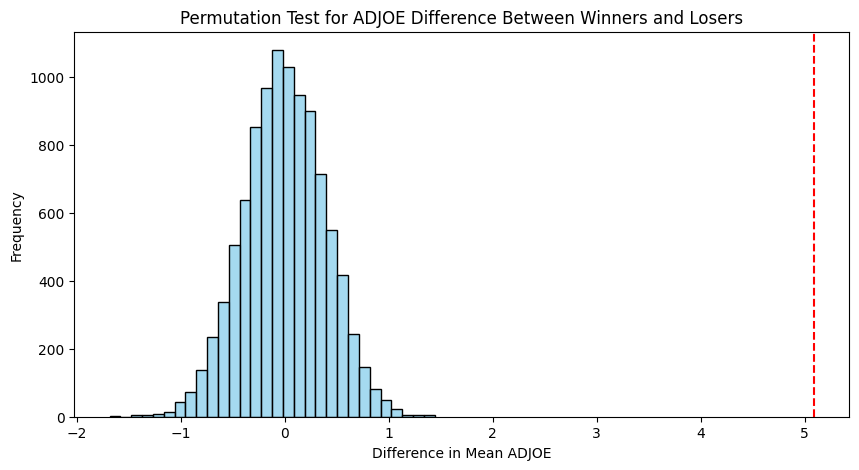

Observed difference in mean ADJOE: 5.090624999999989
P-value: 0.0


In [43]:
winners_adjoe = data[data['Is_32'] == 1]['ADJOE']
losers_adjoe = data[data['Is_32'] == 0]['ADJOE']

# Calculate the observed difference in ADJOE
observed_diff_adjoe = np.mean(winners_adjoe) - np.mean(losers_adjoe)

# Combine ADJOE values from both winners and losers for permutation
combined_adjoe = pd.concat([winners_adjoe, losers_adjoe])

# Initialize list to hold permutation differences
perm_diffs_adjoe = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined ADJOE values
    shuffled_adjoe = combined_adjoe.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_adjoe = shuffled_adjoe[:len(winners_adjoe)]
    shuffled_losers_adjoe = shuffled_adjoe[len(winners_adjoe):]
    
    # Calculate the difference in mean ADJOE for this permutation
    perm_diff_adjoE = np.mean(shuffled_winners_adjoe) - np.mean(shuffled_losers_adjoe)
    
    # Append the difference to the list
    perm_diffs_adjoe.append(perm_diff_adjoE)

# Calculate the p-value based on the observed difference
p_value_adjoe= (sum(perm_diffs_adjoe >= observed_diff_adjoe) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_adjoe, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_adjoe, color='red', linestyle='--')
plt.title('Permutation Test for ADJOE Difference Between Winners and Losers')
plt.xlabel('Difference in Mean ADJOE')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value
print('Observed difference in mean ADJOE:', observed_diff_adjoe)
print('P-value:', p_value_adjoe)

### Bootstrap ADJDE

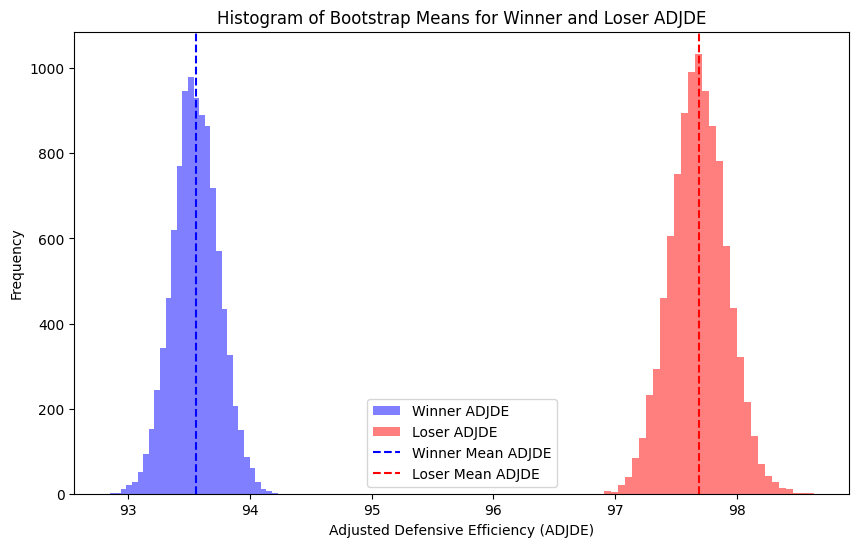

Winner ADJDE Mean CI: [93.18748437 93.93104688]
Loser ADJDE Mean CI: [97.23998958 98.13043229]


In [44]:
winner_means_adjde = bootstrap_mean(winner['ADJDE'])
loser_means_adjde = bootstrap_mean(loser['ADJDE'])

# Confidence intervals
winner_ci_adjde = np.percentile(winner_means_adjde, [2.5, 97.5])
loser_ci_adjde = np.percentile(loser_means_adjde, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_adjde, bins=30, alpha=0.5, label='Winner ADJDE', color='blue')
plt.hist(loser_means_adjde, bins=30, alpha=0.5, label='Loser ADJDE', color='red')
plt.axvline(np.mean(winner_means_adjde), color='blue', linestyle='--', label='Winner Mean ADJDE')
plt.axvline(np.mean(loser_means_adjde), color='red', linestyle='--', label='Loser Mean ADJDE')
plt.title('Histogram of Bootstrap Means for Winner and Loser ADJDE')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner ADJDE Mean CI:', winner_ci_adjde)
print('Loser ADJDE Mean CI:', loser_ci_adjde)

### Hypothesis Test ADJDE

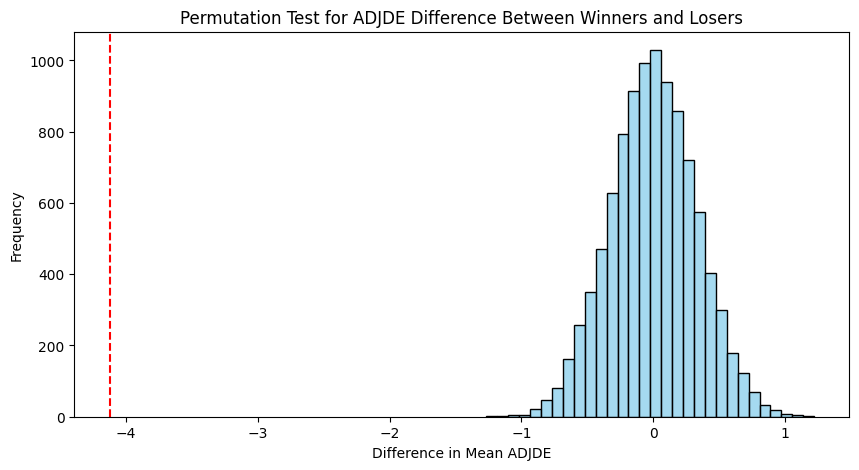

Observed difference in mean ADJDE: -4.1245833333333195
P-value: 0.0


In [45]:
# Separate winners and losers based on 'Is_32' flag
winners_adjde = data[data['Is_32'] == 1]['ADJDE']
losers_adjde = data[data['Is_32'] == 0]['ADJDE']

# Calculate the observed difference in ADJDE
observed_diff_adjde = np.mean(winners_adjde) - np.mean(losers_adjde)

# Combine ADJDE values from both winners and losers for permutation
combined_adjde = pd.concat([winners_adjde, losers_adjde])

# Initialize list to hold permutation differences
perm_diffs_adjde = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined ADJDE values
    shuffled_adjde = combined_adjde.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_adjde = shuffled_adjde[:len(winners_adjde)]
    shuffled_losers_adjde = shuffled_adjde[len(winners_adjde):]
    
    # Calculate the difference in mean ADJDE for this permutation
    perm_diff_adjde = np.mean(shuffled_winners_adjde) - np.mean(shuffled_losers_adjde)
    
    # Append the difference to the list
    perm_diffs_adjde.append(perm_diff_adjde)

# Calculate the p-value based on the observed difference
p_value_adjde = (sum(perm_diffs_adjde <= observed_diff_adjde) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_adjde, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_adjde, color='red', linestyle='--')
plt.title('Permutation Test for ADJDE Difference Between Winners and Losers')
plt.xlabel('Difference in Mean ADJDE')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value
print('Observed difference in mean ADJDE:', observed_diff_adjde)
print('P-value:', p_value_adjde)


### Bootstrap EFG%

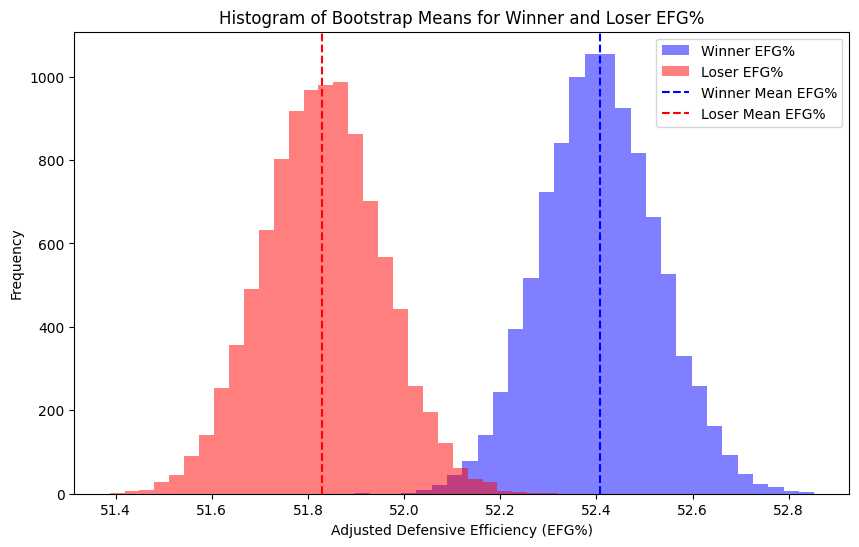

Winner EFG% CI: [52.17604167 52.64792708]
Loser EFG% CI: [51.59144271 52.07270833]


In [46]:
winner_means = bootstrap_mean(winner['EFG%'])
loser_means = bootstrap_mean(loser['EFG%'])

# Confidence intervals
winner_ci = np.percentile(winner_means, [2.5, 97.5])
loser_ci = np.percentile(loser_means, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means, bins=30, alpha=0.5, label='Winner EFG%', color='blue')
plt.hist(loser_means, bins=30, alpha=0.5, label='Loser EFG%', color='red')
plt.axvline(np.mean(winner_means), color='blue', linestyle='--', label='Winner Mean EFG%')
plt.axvline(np.mean(loser_means), color='red', linestyle='--', label='Loser Mean EFG%')
plt.title('Histogram of Bootstrap Means for Winner and Loser EFG%')
plt.xlabel('Adjusted Defensive Efficiency (EFG%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner EFG% CI:', winner_ci)
print('Loser EFG% CI:', loser_ci)

### Hypothesis Testing EFG%

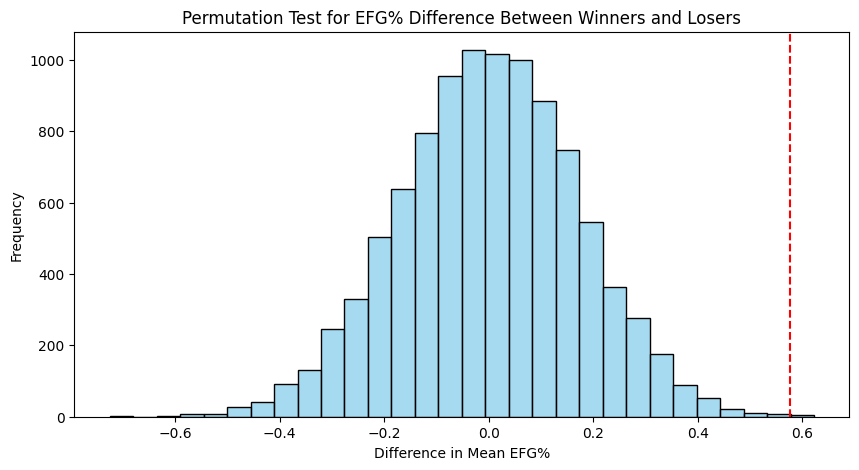

Observed difference in mean EFG%: 0.5762500000000017
P-value: 0.0005


In [47]:
winners = data[data['Is_32'] == 1]['EFG%']
losers = data[data['Is_32'] == 0]['EFG%']

# Calculate the observed difference in EFG%
observed_diff_efg = np.mean(winners) - np.mean(losers)

# Combine EFG% values from both winners and losers for permutation
combined_efg = pd.concat([winners, losers])

# Initialize list to hold permutation differences
perm_diffs_efg = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined EFG% values
    shuffled_efg = combined_efg.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners = shuffled_efg[:len(winners)]
    shuffled_losers = shuffled_efg[len(winners):]
    
    # Calculate the difference in mean EFG% for this permutation
    perm_diff_efg = np.mean(shuffled_winners) - np.mean(shuffled_losers)
    
    # Append the difference to the list
    perm_diffs_efg.append(perm_diff_efg)

# Calculate the p-value based on the observed difference
p_value_efg = (sum(perm_diffs_efg >= observed_diff_efg) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_efg, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_efg, color='red', linestyle='--')
plt.title('Permutation Test for EFG% Difference Between Winners and Losers')
plt.xlabel('Difference in Mean EFG%')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value
print('Observed difference in mean EFG%:', observed_diff_efg)
print('P-value:', p_value_efg)


### Bootstrap 2P%

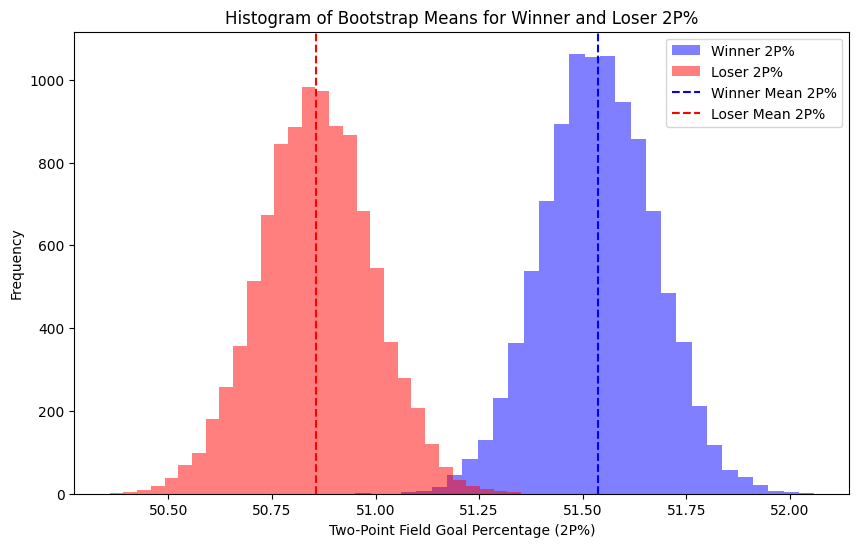

Winner 2P% 95% CI: [51.27352604 51.8       ]
Loser 2P% 95% CI: [50.59269792 51.12104167]


In [90]:
winner_means_2p = bootstrap_mean(winner['2P%'])
loser_means_2p = bootstrap_mean(loser['2P%'])

# Confidence intervals
winner_ci_2p = np.percentile(winner_means_2p, [2.5, 97.5])
loser_ci_2p = np.percentile(loser_means_2p, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_2p, bins=30, alpha=0.5, label='Winner 2P%', color='blue')
plt.hist(loser_means_2p, bins=30, alpha=0.5, label='Loser 2P%', color='red')
plt.axvline(np.mean(winner_means_2p), color='blue', linestyle='--', label='Winner Mean 2P%')
plt.axvline(np.mean(loser_means_2p), color='red', linestyle='--', label='Loser Mean 2P%')
plt.title('Histogram of Bootstrap Means for Winner and Loser 2P%')
plt.xlabel('Two-Point Field Goal Percentage (2P%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner 2P% 95% CI:', winner_ci_2p)
print('Loser 2P% 95% CI:', loser_ci_2p)


### Hypothesis Testing 2P%

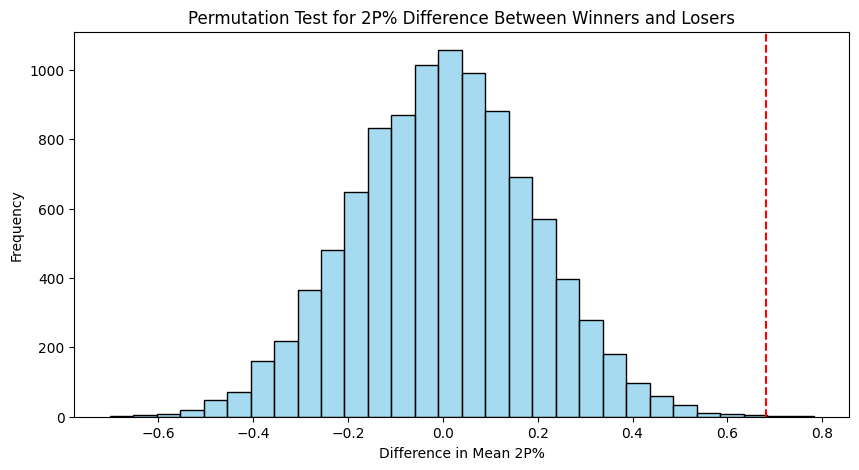

Observed difference in mean 2P%: 0.681874999999998
P-value: 0.0002


In [49]:
# Separate winners and losers based on 'Is_32' flag for 2P%
winners_2p = data[data['Is_32'] == 1]['2P%']
losers_2p = data[data['Is_32'] == 0]['2P%']

# Calculate the observed difference in 2P%
observed_diff_2p = np.mean(winners_2p) - np.mean(losers_2p)

# Combine 2P% values from both winners and losers for permutation
combined_2p = pd.concat([winners_2p, losers_2p])

# Initialize list to hold permutation differences
perm_diffs_2p = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined 2P% values
    shuffled_2p = combined_2p.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_2p = shuffled_2p[:len(winners_2p)]
    shuffled_losers_2p = shuffled_2p[len(winners_2p):]
    
    # Calculate the difference in mean 2P% for this permutation
    perm_diff_2p = np.mean(shuffled_winners_2p) - np.mean(shuffled_losers_2p)
    
    # Append the difference to the list
    perm_diffs_2p.append(perm_diff_2p)

# Calculate the p-value based on the observed difference
p_value_2p = (sum(perm_diffs_2p >= observed_diff_2p) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_2p, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_2p, color='red', linestyle='--')
plt.title('Permutation Test for 2P% Difference Between Winners and Losers')
plt.xlabel('Difference in Mean 2P%')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value
print('Observed difference in mean 2P%:', observed_diff_2p)
print('P-value:', p_value_2p)


### Bootstrap 3P%

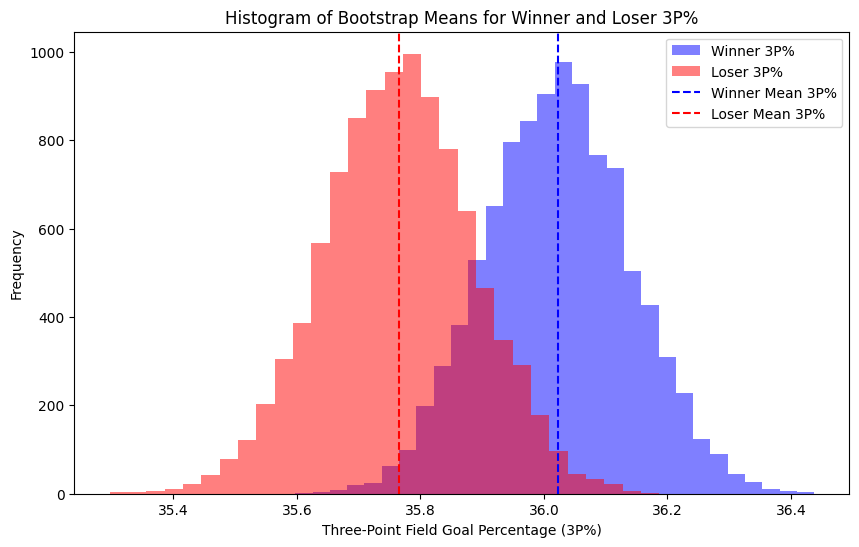

Winner 3P% 95% CI: [35.79978646 36.25084375]
Loser 3P% 95% CI: [35.52748958 36.00000521]


In [50]:
winner_means_3p = bootstrap_mean(winner['3P%'])
loser_means_3p = bootstrap_mean(loser['3P%'])

# Confidence intervals
winner_ci_3p = np.percentile(winner_means_3p, [2.5, 97.5])
loser_ci_3p = np.percentile(loser_means_3p, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_3p, bins=30, alpha=0.5, label='Winner 3P%', color='blue')
plt.hist(loser_means_3p, bins=30, alpha=0.5, label='Loser 3P%', color='red')
plt.axvline(np.mean(winner_means_3p), color='blue', linestyle='--', label='Winner Mean 3P%')
plt.axvline(np.mean(loser_means_3p), color='red', linestyle='--', label='Loser Mean 3P%')
plt.title('Histogram of Bootstrap Means for Winner and Loser 3P%')
plt.xlabel('Three-Point Field Goal Percentage (3P%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner 3P% 95% CI:', winner_ci_3p)
print('Loser 3P% 95% CI:', loser_ci_3p)

### Hypothesis Testing 3P%

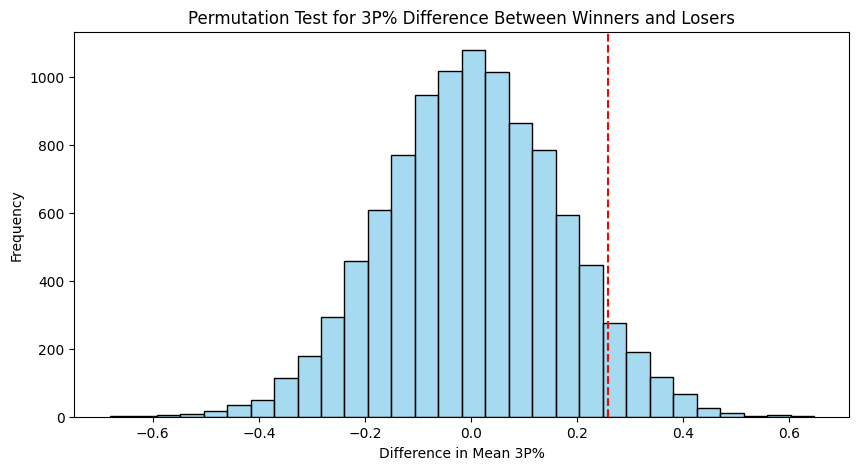

Observed difference in mean 3P%: 0.25833333333333286
P-value: 0.0644


In [89]:
winners_3p = data[data['Is_32'] == 1]['3P%']
losers_3p = data[data['Is_32'] == 0]['3P%']

# Calculate the observed difference in 3P%
observed_diff_3p = np.mean(winners_3p) - np.mean(losers_3p)

# Combine 3P% values from both winners and losers for permutation
combined_3p = pd.concat([winners_3p, losers_3p])

# Initialize list to hold permutation differences
perm_diffs_3p = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined 3P% values
    shuffled_3p = combined_3p.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_3p = shuffled_3p[:len(winners_3p)]
    shuffled_losers_3p = shuffled_3p[len(winners_3p):]
    
    # Calculate the difference in mean 3P% for this permutation
    perm_diff_3p = np.mean(shuffled_winners_3p) - np.mean(shuffled_losers_3p)
    
    # Append the difference to the list
    perm_diffs_3p.append(perm_diff_3p)

# Calculate the p-value based on the observed difference
p_value_3p = (sum(perm_diffs_3p >= observed_diff_3p) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_3p, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_3p, color='red', linestyle='--')
plt.title('Permutation Test for 3P% Difference Between Winners and Losers')
plt.xlabel('Difference in Mean 3P%')
plt.ylabel('Frequency')
plt.show()

print('Observed difference in mean 3P%:', observed_diff_3p)
print('P-value:', p_value_3p)


### Bootstrap 3PR

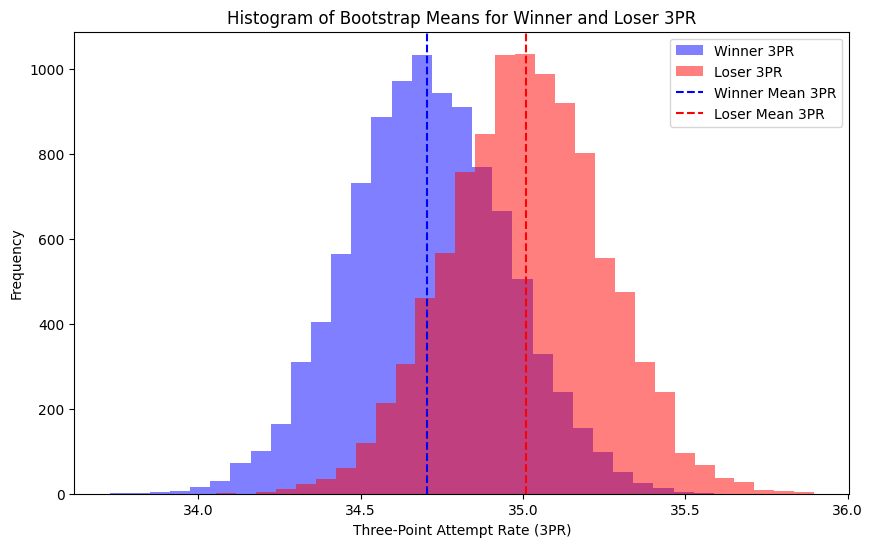

Winner 3PR 95% CI: [34.23454687 35.18608333]
Loser 3PR 95% CI: [34.54624479 35.46604688]


In [52]:
winner_means_3pr = bootstrap_mean(winner['3PR'])
loser_means_3pr = bootstrap_mean(loser['3PR'])

# Confidence intervals
winner_ci_3pr = np.percentile(winner_means_3pr, [2.5, 97.5])
loser_ci_3pr = np.percentile(loser_means_3pr, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_3pr, bins=30, alpha=0.5, label='Winner 3PR', color='blue')
plt.hist(loser_means_3pr, bins=30, alpha=0.5, label='Loser 3PR', color='red')
plt.axvline(np.mean(winner_means_3pr), color='blue', linestyle='--', label='Winner Mean 3PR')
plt.axvline(np.mean(loser_means_3pr), color='red', linestyle='--', label='Loser Mean 3PR')
plt.title('Histogram of Bootstrap Means for Winner and Loser 3PR')
plt.xlabel('Three-Point Attempt Rate (3PR)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner 3PR 95% CI:', winner_ci_3pr)
print('Loser 3PR 95% CI:', loser_ci_3pr)

### Hypothesis Testing 3PR

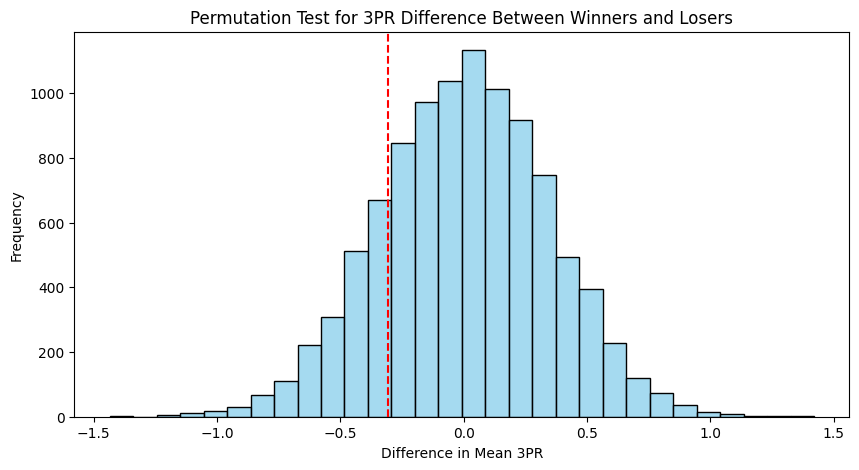

Observed difference in mean 3PR: -0.30562499999999915
P-value: 0.8161


In [53]:
winners_3pr = data[data['Is_32'] == 1]['3PR']
losers_3pr = data[data['Is_32'] == 0]['3PR']

# Calculate the observed difference in 3PR
observed_diff_3pr = np.mean(winners_3pr) - np.mean(losers_3pr)

# Combine 3PR values from both winners and losers for permutation
combined_3pr = pd.concat([winners_3pr, losers_3pr])

# Initialize list to hold permutation differences
perm_diffs_3pr = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined 3PR values
    shuffled_3pr = combined_3pr.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_3pr = shuffled_3pr[:len(winners_3pr)]
    shuffled_losers_3pr = shuffled_3pr[len(winners_3pr):]
    
    # Calculate the difference in mean 3PR for this permutation
    perm_diff_3pr = np.mean(shuffled_winners_3pr) - np.mean(shuffled_losers_3pr)
    
    # Append the difference to the list
    perm_diffs_3pr.append(perm_diff_3pr)

# Calculate the p-value based on the observed difference
p_value_3pr = (sum(perm_diffs_3pr >= observed_diff_3pr) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_3pr, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_3pr, color='red', linestyle='--')
plt.title('Permutation Test for 3PR Difference Between Winners and Losers')
plt.xlabel('Difference in Mean 3PR')
plt.ylabel('Frequency')
plt.show()

print('Observed difference in mean 3PR:', observed_diff_3pr)
print('P-value:', p_value_3pr)


### Bootstrap Seed

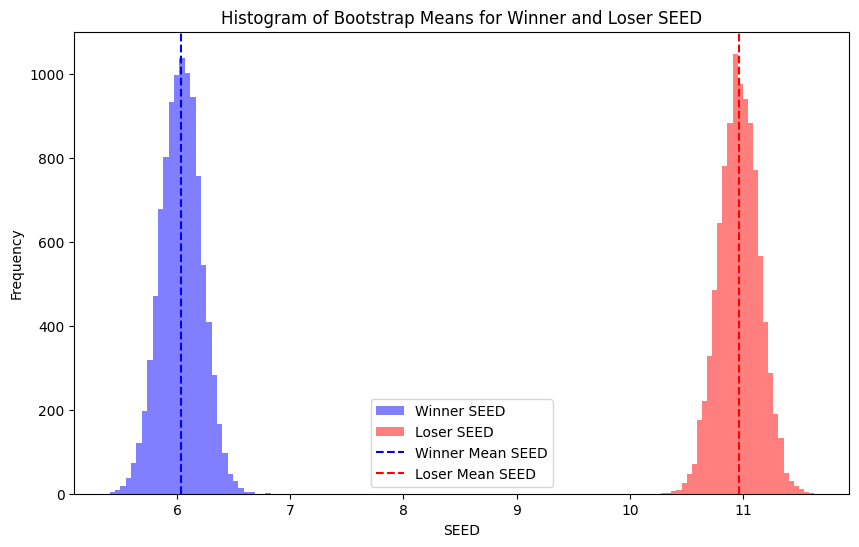

Winner SEED 95% CI: [5.68541667 6.38541667]
Loser SEED 95% CI: [10.61875    11.31046875]


In [54]:
# Bootstrap means for SEED
winner_means_seed = bootstrap_mean(winner['SEED'])
loser_means_seed = bootstrap_mean(loser['SEED'])

# Confidence intervals
winner_ci_seed = np.percentile(winner_means_seed, [2.5, 97.5])
loser_ci_seed = np.percentile(loser_means_seed, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_seed, bins=30, alpha=0.5, label='Winner SEED', color='blue')
plt.hist(loser_means_seed, bins=30, alpha=0.5, label='Loser SEED', color='red')
plt.axvline(np.mean(winner_means_seed), color='blue', linestyle='--', label='Winner Mean SEED')
plt.axvline(np.mean(loser_means_seed), color='red', linestyle='--', label='Loser Mean SEED')
plt.title('Histogram of Bootstrap Means for Winner and Loser SEED')
plt.xlabel('SEED')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner SEED 95% CI:', winner_ci_seed)
print('Loser SEED 95% CI:', loser_ci_seed)

### Hypothesis Testing Seed

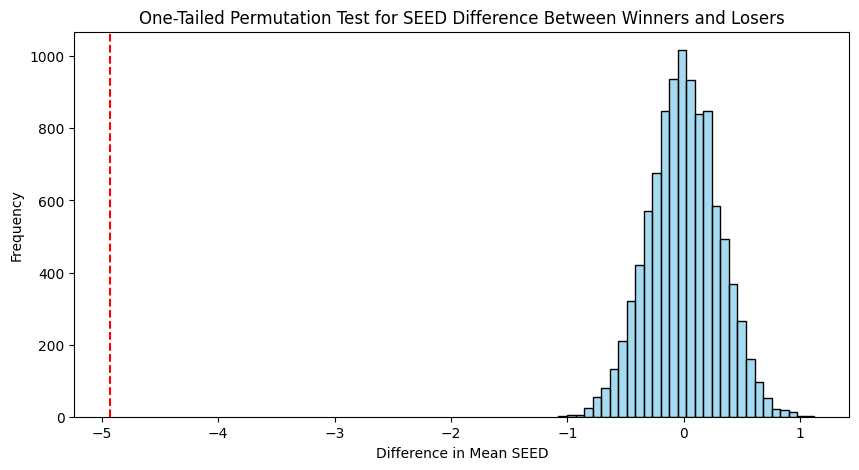

Observed difference in mean SEED: -4.93125
One-tailed p-value (lower seed for winners): 0.0


In [55]:
winners_seed = data[data['Is_32'] == 1]['SEED']
losers_seed = data[data['Is_32'] == 0]['SEED']

# Calculate the observed difference in SEED
observed_diff_seed = np.mean(winners_seed) - np.mean(losers_seed)

# Combine SEED values for permutation
combined_seed = pd.concat([winners_seed, losers_seed])

# Initialize list for permutation differences
perm_diffs_seed = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle and split the combined SEED values
    shuffled_seed = combined_seed.sample(frac=1, replace=False).values
    shuffled_winners_seed = shuffled_seed[:len(winners_seed)]
    shuffled_losers_seed = shuffled_seed[len(winners_seed):]
    
    perm_diff_seed = np.mean(shuffled_winners_seed) - np.mean(shuffled_losers_seed)
    perm_diffs_seed.append(perm_diff_seed)

# One-tailed p-value calculation (lower seed is better)
p_value_seed = sum(perm_diffs_seed <= observed_diff_seed) / n_permutations

plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_seed, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_seed, color='red', linestyle='--')
plt.title('One-Tailed Permutation Test for SEED Difference Between Winners and Losers')
plt.xlabel('Difference in Mean SEED')
plt.ylabel('Frequency')
plt.show()

print('Observed difference in mean SEED:', observed_diff_seed)
print('One-tailed p-value (lower seed for winners):', p_value_seed)


### Bootstrap EFGD%

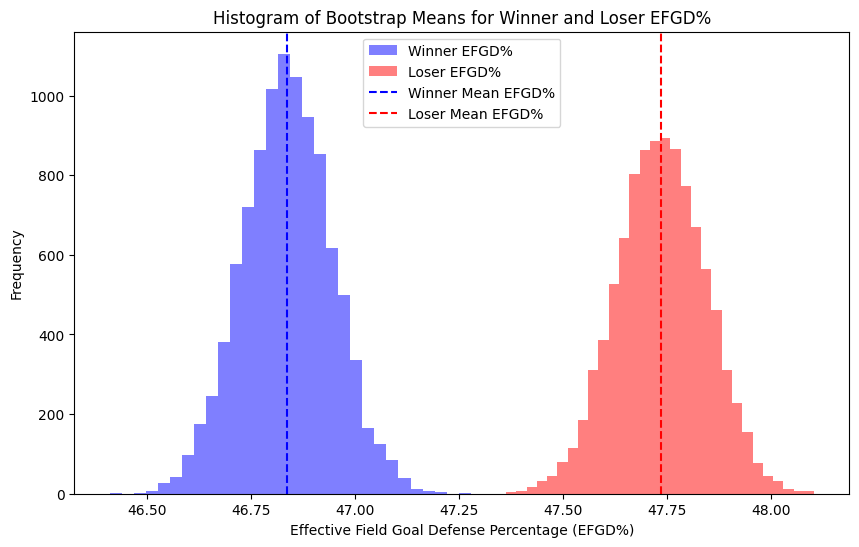

Winner EFGD% Mean CI: [46.62791667 47.05146875]
Loser EFGD% Mean CI: [47.52604167 47.94229687]


In [56]:
# Assuming bootstrap_mean is a function you've defined elsewhere to perform bootstrapping
winner_means_efgd = bootstrap_mean(winner['EFGD%'])
loser_means_efgd = bootstrap_mean(loser['EFGD%'])

# Confidence intervals
winner_ci_efgd = np.percentile(winner_means_efgd, [2.5, 97.5])
loser_ci_efgd = np.percentile(loser_means_efgd, [2.5, 97.5])

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(winner_means_efgd, bins=30, alpha=0.5, label='Winner EFGD%', color='blue')
plt.hist(loser_means_efgd, bins=30, alpha=0.5, label='Loser EFGD%', color='red')
plt.axvline(np.mean(winner_means_efgd), color='blue', linestyle='--', label='Winner Mean EFGD%')
plt.axvline(np.mean(loser_means_efgd), color='red', linestyle='--', label='Loser Mean EFGD%')
plt.title('Histogram of Bootstrap Means for Winner and Loser EFGD%')
plt.xlabel('Effective Field Goal Defense Percentage (EFGD%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals
print('Winner EFGD% Mean CI:', winner_ci_efgd)
print('Loser EFGD% Mean CI:', loser_ci_efgd)


### Hypothesis Testing EFGD%

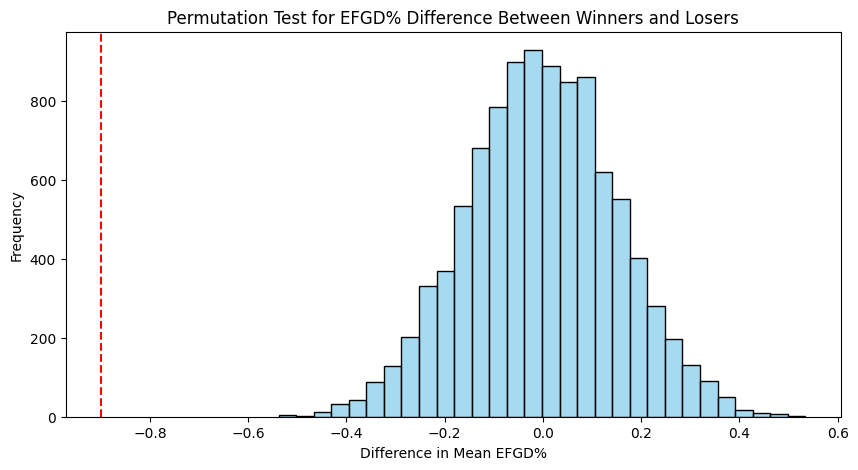

Observed difference in mean EFGD%: -0.8997916666666654
P-value: 0.0


In [57]:
# Separate winners and losers based on 'Is_32' flag for EFGD%
winners_efgd = data[data['Is_32'] == 1]['EFGD%']
losers_efgd = data[data['Is_32'] == 0]['EFGD%']

# Calculate the observed difference in EFGD%
observed_diff_efgd = np.mean(winners_efgd) - np.mean(losers_efgd)

# Combine EFGD% values from both winners and losers for permutation
combined_efgd = pd.concat([winners_efgd, losers_efgd])

# Initialize list to hold permutation differences for EFGD%
perm_diffs_efgd = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined EFGD% values
    shuffled_efgd = combined_efgd.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_efgd = shuffled_efgd[:len(winners_efgd)]
    shuffled_losers_efgd = shuffled_efgd[len(winners_efgd):]
    
    # Calculate the difference in mean EFGD% for this permutation
    perm_diff_efgd = np.mean(shuffled_winners_efgd) - np.mean(shuffled_losers_efgd)
    
    # Append the difference to the list
    perm_diffs_efgd.append(perm_diff_efgd)

# Calculate the p-value based on the observed difference for EFGD%
p_value_efgd = (np.sum(perm_diffs_efgd <= observed_diff_efgd) / n_permutations)

# Plot the results for EFGD%
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_efgd, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_efgd, color='red', linestyle='--')
plt.title('Permutation Test for EFGD% Difference Between Winners and Losers')
plt.xlabel('Difference in Mean EFGD%')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for EFGD%
print('Observed difference in mean EFGD%:', observed_diff_efgd)
print('P-value:', p_value_efgd)


### Bootstrap TOR

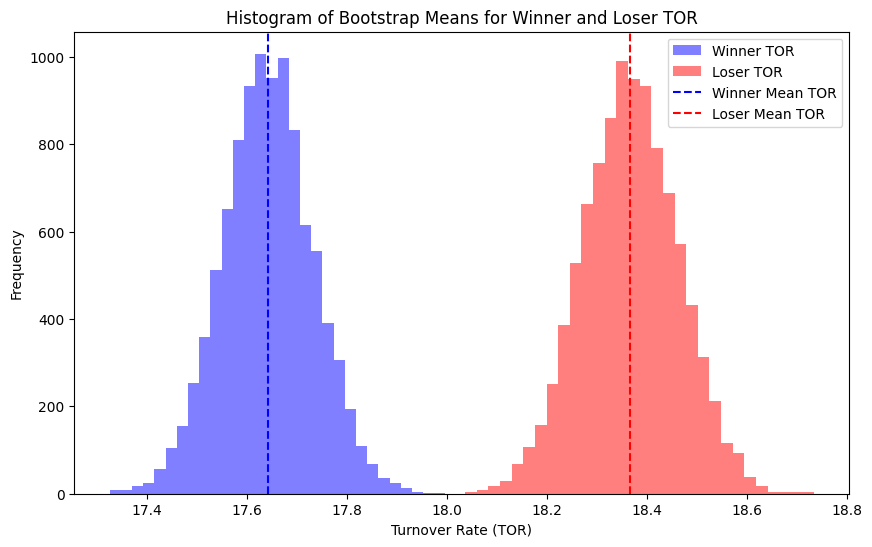

Winner TOR Mean CI: [17.46644792 17.81895833]
Loser TOR Mean CI: [18.17998958 18.55271875]


In [58]:
# Assuming bootstrap_mean is a function you've defined elsewhere to perform bootstrapping
winner_means_tor = bootstrap_mean(winner['TOR'])
loser_means_tor = bootstrap_mean(loser['TOR'])

# Confidence intervals for TOR
winner_ci_tor = np.percentile(winner_means_tor, [2.5, 97.5])
loser_ci_tor = np.percentile(loser_means_tor, [2.5, 97.5])

# Plotting for TOR
plt.figure(figsize=(10, 6))
plt.hist(winner_means_tor, bins=30, alpha=0.5, label='Winner TOR', color='blue')
plt.hist(loser_means_tor, bins=30, alpha=0.5, label='Loser TOR', color='red')
plt.axvline(np.mean(winner_means_tor), color='blue', linestyle='--', label='Winner Mean TOR')
plt.axvline(np.mean(loser_means_tor), color='red', linestyle='--', label='Loser Mean TOR')
plt.title('Histogram of Bootstrap Means for Winner and Loser TOR')
plt.xlabel('Turnover Rate (TOR)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for TOR
print('Winner TOR Mean CI:', winner_ci_tor)
print('Loser TOR Mean CI:', loser_ci_tor)


### Hypothesis Testing TOR

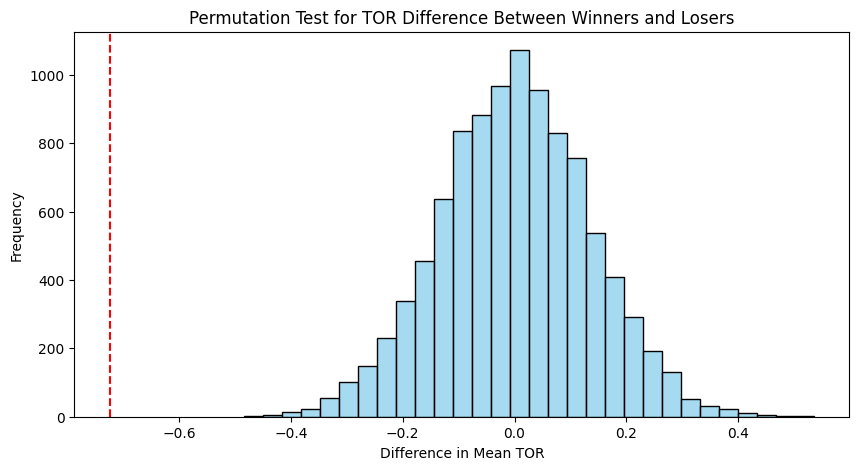

Observed difference in mean TOR: -0.7245833333333316
P-value: 0.0


In [59]:
# Separate winners and losers based on 'Is_32' flag for TOR
winners_tor = data[data['Is_32'] == 1]['TOR']
losers_tor = data[data['Is_32'] == 0]['TOR']

# Calculate the observed difference in TOR
observed_diff_tor = np.mean(winners_tor) - np.mean(losers_tor)

# Combine TOR values from both winners and losers for permutation
combined_tor = pd.concat([winners_tor, losers_tor])

# Initialize list to hold permutation differences for TOR
perm_diffs_tor = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined TOR values
    shuffled_tor = combined_tor.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_tor = shuffled_tor[:len(winners_tor)]
    shuffled_losers_tor = shuffled_tor[len(winners_tor):]
    
    # Calculate the difference in mean TOR for this permutation
    perm_diff_tor = np.mean(shuffled_winners_tor) - np.mean(shuffled_losers_tor)
    
    # Append the difference to the list
    perm_diffs_tor.append(perm_diff_tor)

# Calculate the p-value based on the observed difference for TOR
p_value_tor = (np.sum(perm_diffs_tor <= observed_diff_tor) / n_permutations)

# Plot the results for TOR
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_tor, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_tor, color='red', linestyle='--')
plt.title('Permutation Test for TOR Difference Between Winners and Losers')
plt.xlabel('Difference in Mean TOR')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for TOR
print('Observed difference in mean TOR:', observed_diff_tor)
print('P-value:', p_value_tor)


### Bootstrap TORD

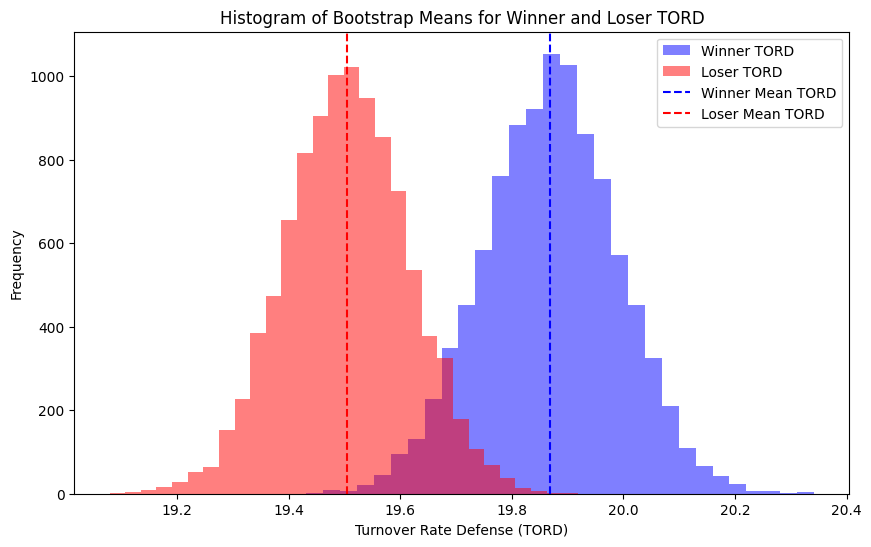

Winner TORD Mean CI: [19.63229167 20.10125   ]
Loser TORD Mean CI: [19.28833333 19.72042187]


In [60]:
# Assuming bootstrap_mean is a function you've defined elsewhere to perform bootstrapping
winner_means_tord = bootstrap_mean(winner['TORD'])
loser_means_tord = bootstrap_mean(loser['TORD'])

# Confidence intervals for TORD
winner_ci_tord = np.percentile(winner_means_tord, [2.5, 97.5])
loser_ci_tord = np.percentile(loser_means_tord, [2.5, 97.5])

# Plotting for TORD
plt.figure(figsize=(10, 6))
plt.hist(winner_means_tord, bins=30, alpha=0.5, label='Winner TORD', color='blue')
plt.hist(loser_means_tord, bins=30, alpha=0.5, label='Loser TORD', color='red')
plt.axvline(np.mean(winner_means_tord), color='blue', linestyle='--', label='Winner Mean TORD')
plt.axvline(np.mean(loser_means_tord), color='red', linestyle='--', label='Loser Mean TORD')
plt.title('Histogram of Bootstrap Means for Winner and Loser TORD')
plt.xlabel('Turnover Rate Defense (TORD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for TORD
print('Winner TORD Mean CI:', winner_ci_tord)
print('Loser TORD Mean CI:', loser_ci_tord)

### Hypothesis Testing TORD

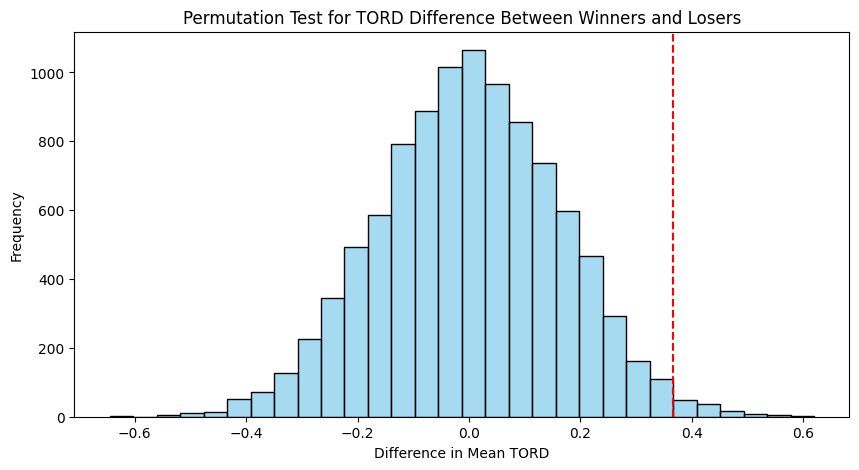

Observed difference in mean TORD: 0.36604166666666416
P-value: 0.0117


In [61]:
# Separate winners and losers based on 'Is_32' flag for TORD
winners_tord = data[data['Is_32'] == 1]['TORD']
losers_tord = data[data['Is_32'] == 0]['TORD']

# Calculate the observed difference in TORD
observed_diff_tord = np.mean(winners_tord) - np.mean(losers_tord)

# Combine TORD values from both winners and losers for permutation
combined_tord = pd.concat([winners_tord, losers_tord])

# Initialize list to hold permutation differences for TORD
perm_diffs_tord = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined TORD values
    shuffled_tord = combined_tord.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_tord = shuffled_tord[:len(winners_tord)]
    shuffled_losers_tord = shuffled_tord[len(winners_tord):]
    
    # Calculate the difference in mean TORD for this permutation
    perm_diff_tord = np.mean(shuffled_winners_tord) - np.mean(shuffled_losers_tord)
    
    # Append the difference to the list
    perm_diffs_tord.append(perm_diff_tord)

# Calculate the p-value based on the observed difference for TORD
p_value_tord = (np.sum(perm_diffs_tord >= observed_diff_tord) / n_permutations)

# Plot the results for TORD
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_tord, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_tord, color='red', linestyle='--')
plt.title('Permutation Test for TORD Difference Between Winners and Losers')
plt.xlabel('Difference in Mean TORD')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for TORD
print('Observed difference in mean TORD:', observed_diff_tord)
print('P-value:', p_value_tord)


### Bootstrap 2P%D

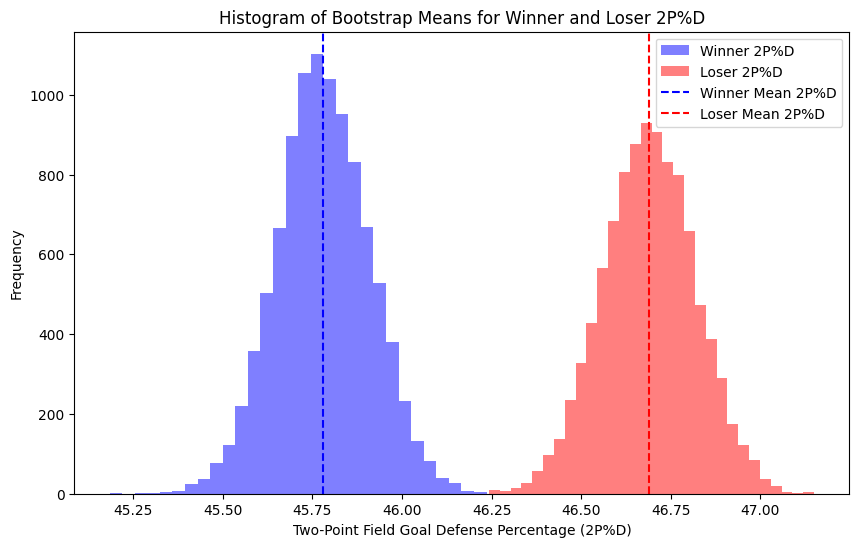

Winner 2P%D Mean CI: [45.52811979 46.03375521]
Loser 2P%D Mean CI: [46.43352604 46.94376042]


In [62]:
# Assuming bootstrap_mean is a function defined elsewhere for performing bootstrapping
winner_means_2pd = bootstrap_mean(winner['2P%D'])
loser_means_2pd = bootstrap_mean(loser['2P%D'])

# Confidence intervals for 2P%D
winner_ci_2pd = np.percentile(winner_means_2pd, [2.5, 97.5])
loser_ci_2pd = np.percentile(loser_means_2pd, [2.5, 97.5])

# Plotting for 2P%D
plt.figure(figsize=(10, 6))
plt.hist(winner_means_2pd, bins=30, alpha=0.5, label='Winner 2P%D', color='blue')
plt.hist(loser_means_2pd, bins=30, alpha=0.5, label='Loser 2P%D', color='red')
plt.axvline(np.mean(winner_means_2pd), color='blue', linestyle='--', label='Winner Mean 2P%D')
plt.axvline(np.mean(loser_means_2pd), color='red', linestyle='--', label='Loser Mean 2P%D')
plt.title('Histogram of Bootstrap Means for Winner and Loser 2P%D')
plt.xlabel('Two-Point Field Goal Defense Percentage (2P%D)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for 2P%D
print('Winner 2P%D Mean CI:', winner_ci_2pd)
print('Loser 2P%D Mean CI:', loser_ci_2pd)


### Hypothesis Testing 2P%D

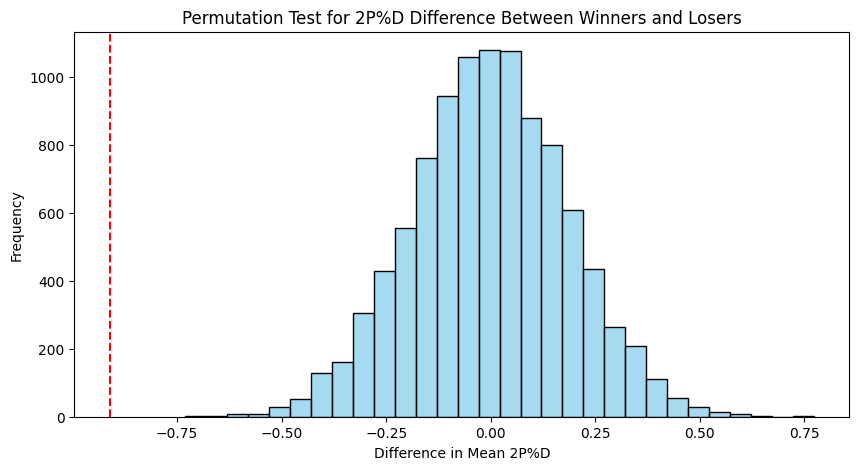

Observed difference in mean 2P%D: -0.9112499999999955
P-value: 0.0


In [63]:
# Separate winners and losers based on 'Is_32' flag for 2P%D
winners_2pd = data[data['Is_32'] == 1]['2P%D']
losers_2pd = data[data['Is_32'] == 0]['2P%D']

# Calculate the observed difference in 2P%D
observed_diff_2pd = np.mean(winners_2pd) - np.mean(losers_2pd)

# Combine 2P%D values from both winners and losers for permutation
combined_2pd = pd.concat([winners_2pd, losers_2pd])

# Initialize list to hold permutation differences for 2P%D
perm_diffs_2pd = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined 2P%D values
    shuffled_2pd = combined_2pd.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_2pd = shuffled_2pd[:len(winners_2pd)]
    shuffled_losers_2pd = shuffled_2pd[len(winners_2pd):]
    
    # Calculate the difference in mean 2P%D for this permutation
    perm_diff_2pd = np.mean(shuffled_winners_2pd) - np.mean(shuffled_losers_2pd)
    
    # Append the difference to the list
    perm_diffs_2pd.append(perm_diff_2pd)

# Calculate the p-value based on the observed difference for 2P%D
p_value_2pd = (np.sum(perm_diffs_2pd <= observed_diff_2pd) / n_permutations)

# Plot the results for 2P%D
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_2pd, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_2pd, color='red', linestyle='--')
plt.title('Permutation Test for 2P%D Difference Between Winners and Losers')
plt.xlabel('Difference in Mean 2P%D')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for 2P%D
print('Observed difference in mean 2P%D:', observed_diff_2pd)
print('P-value:', p_value_2pd)

### Bootstrap 3P%D

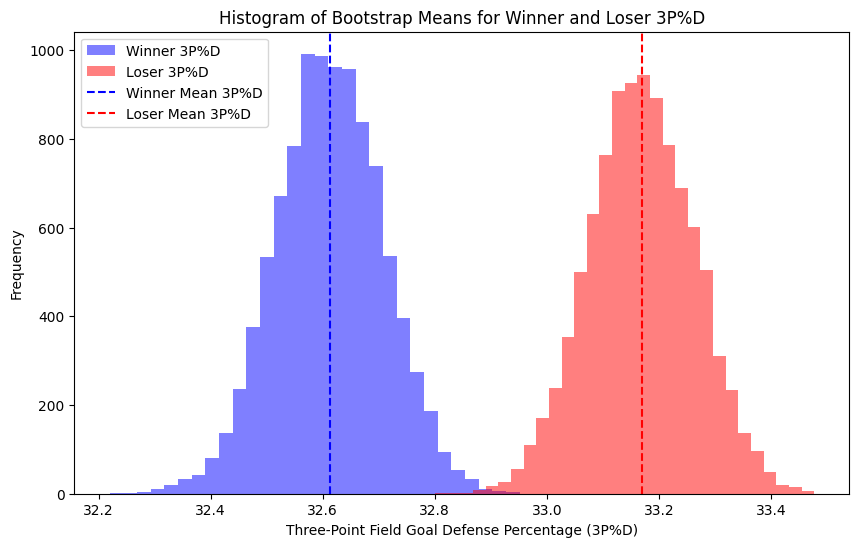

Winner 3P%D Mean CI: [32.42686458 32.79709375]
Loser 3P%D Mean CI: [32.98625    33.35417187]


In [64]:
# Assuming bootstrap_mean is a function defined elsewhere to perform bootstrapping
winner_means_3pd = bootstrap_mean(winner['3P%D'])
loser_means_3pd = bootstrap_mean(loser['3P%D'])

# Confidence intervals for 3P%D
winner_ci_3pd = np.percentile(winner_means_3pd, [2.5, 97.5])
loser_ci_3pd = np.percentile(loser_means_3pd, [2.5, 97.5])

# Plotting for 3P%D
plt.figure(figsize=(10, 6))
plt.hist(winner_means_3pd, bins=30, alpha=0.5, label='Winner 3P%D', color='blue')
plt.hist(loser_means_3pd, bins=30, alpha=0.5, label='Loser 3P%D', color='red')
plt.axvline(np.mean(winner_means_3pd), color='blue', linestyle='--', label='Winner Mean 3P%D')
plt.axvline(np.mean(loser_means_3pd), color='red', linestyle='--', label='Loser Mean 3P%D')
plt.title('Histogram of Bootstrap Means for Winner and Loser 3P%D')
plt.xlabel('Three-Point Field Goal Defense Percentage (3P%D)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for 3P%D
print('Winner 3P%D Mean CI:', winner_ci_3pd)
print('Loser 3P%D Mean CI:', loser_ci_3pd)


### Hypothesis Testing 3P%D

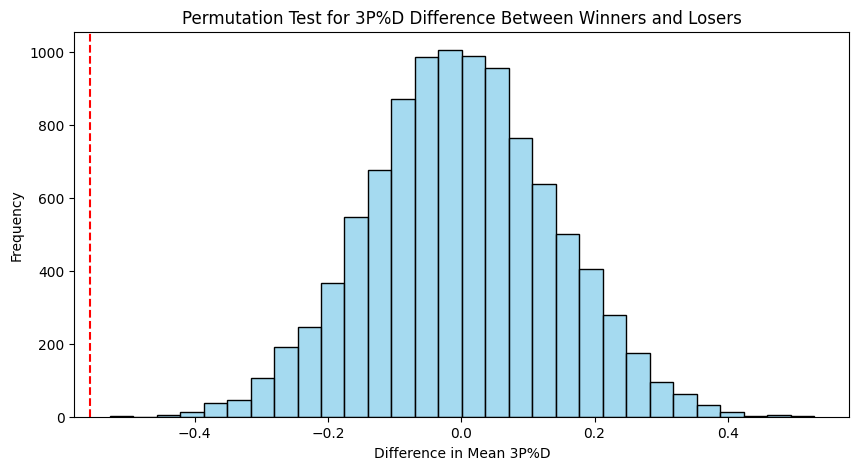

Observed difference in mean 3P%D: -0.5562500000000057
P-value: 0.0


In [65]:
# Separate winners and losers based on 'Is_32' flag for 3P%D
winners_3pd = data[data['Is_32'] == 1]['3P%D']
losers_3pd = data[data['Is_32'] == 0]['3P%D']

# Calculate the observed difference in 3P%D
observed_diff_3pd = np.mean(winners_3pd) - np.mean(losers_3pd)

# Combine 3P%D values from both winners and losers for permutation
combined_3pd = pd.concat([winners_3pd, losers_3pd])

# Initialize list to hold permutation differences for 3P%D
perm_diffs_3pd = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined 3P%D values
    shuffled_3pd = combined_3pd.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_3pd = shuffled_3pd[:len(winners_3pd)]
    shuffled_losers_3pd = shuffled_3pd[len(winners_3pd):]
    
    # Calculate the difference in mean 3P%D for this permutation
    perm_diff_3pd = np.mean(shuffled_winners_3pd) - np.mean(shuffled_losers_3pd)
    
    # Append the difference to the list
    perm_diffs_3pd.append(perm_diff_3pd)

# Calculate the p-value based on the observed difference for 3P%D
p_value_3pd = (np.sum(perm_diffs_3pd <= observed_diff_3pd) / n_permutations)

# Plot the results for 3P%D
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_3pd, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_3pd, color='red', linestyle='--')
plt.title('Permutation Test for 3P%D Difference Between Winners and Losers')
plt.xlabel('Difference in Mean 3P%D')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for 3P%D
print('Observed difference in mean 3P%D:', observed_diff_3pd)
print('P-value:', p_value_3pd)


### Bootstrap 3PRD

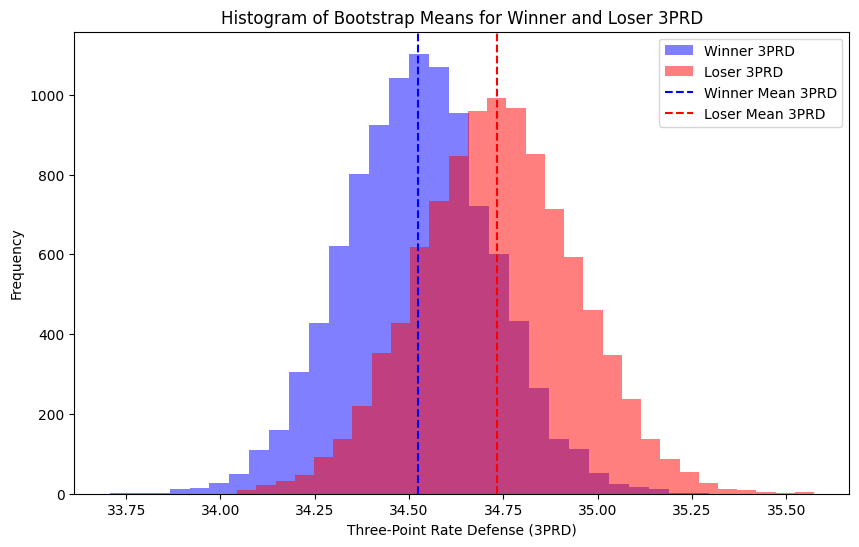

Winner 3PRD Mean CI: [34.14477083 34.90979167]
Loser 3PRD Mean CI: [34.32041146 35.14523438]


In [66]:
# Assuming bootstrap_mean is a function defined elsewhere for performing bootstrapping
winner_means_3prd = bootstrap_mean(winner['3PRD'])
loser_means_3prd = bootstrap_mean(loser['3PRD'])

# Confidence intervals for 3PRD
winner_ci_3prd = np.percentile(winner_means_3prd, [2.5, 97.5])
loser_ci_3prd = np.percentile(loser_means_3prd, [2.5, 97.5])

# Plotting for 3PRD
plt.figure(figsize=(10, 6))
plt.hist(winner_means_3prd, bins=30, alpha=0.5, label='Winner 3PRD', color='blue')
plt.hist(loser_means_3prd, bins=30, alpha=0.5, label='Loser 3PRD', color='red')
plt.axvline(np.mean(winner_means_3prd), color='blue', linestyle='--', label='Winner Mean 3PRD')
plt.axvline(np.mean(loser_means_3prd), color='red', linestyle='--', label='Loser Mean 3PRD')
plt.title('Histogram of Bootstrap Means for Winner and Loser 3PRD')
plt.xlabel('Three-Point Rate Defense (3PRD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for 3PRD
print('Winner 3PRD Mean CI:', winner_ci_3prd)
print('Loser 3PRD Mean CI:', loser_ci_3prd)


### Hypothesis Testing 3PRD

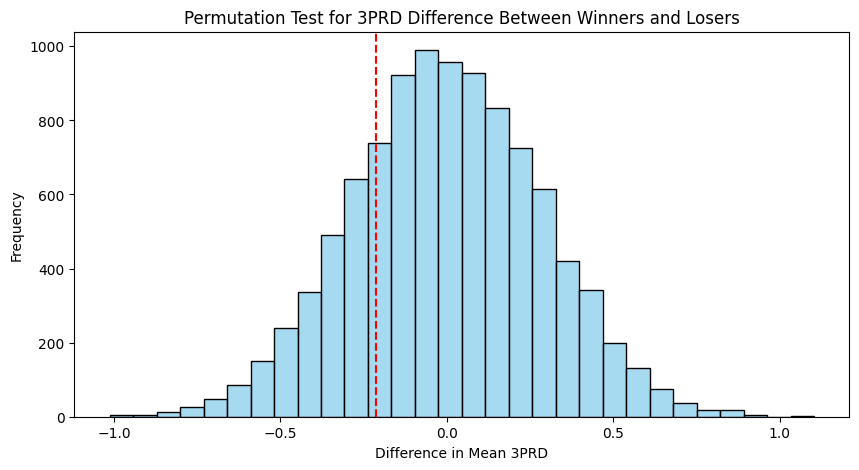

Observed difference in mean 3PRD: -0.21250000000000568
P-value: 0.2267


In [67]:
# Separate winners and losers based on 'Is_32' flag for 3PRD
winners_3prd = data[data['Is_32'] == 1]['3PRD']
losers_3prd = data[data['Is_32'] == 0]['3PRD']

# Calculate the observed difference in 3PRD
observed_diff_3prd = np.mean(winners_3prd) - np.mean(losers_3prd)

# Combine 3PRD values from both winners and losers for permutation
combined_3prd = pd.concat([winners_3prd, losers_3prd])

# Initialize list to hold permutation differences for 3PRD
perm_diffs_3prd = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined 3PRD values
    shuffled_3prd = combined_3prd.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_3prd = shuffled_3prd[:len(winners_3prd)]
    shuffled_losers_3prd = shuffled_3prd[len(winners_3prd):]
    
    # Calculate the difference in mean 3PRD for this permutation
    perm_diff_3prd = np.mean(shuffled_winners_3prd) - np.mean(shuffled_losers_3prd)
    
    # Append the difference to the list
    perm_diffs_3prd.append(perm_diff_3prd)

# Calculate the p-value based on the observed difference for 3PRD
p_value_3prd = (np.sum(perm_diffs_3prd <= observed_diff_3prd) / n_permutations)

# Plot the results for 3PRD
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_3prd, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_3prd, color='red', linestyle='--')
plt.title('Permutation Test for 3PRD Difference Between Winners and Losers')
plt.xlabel('Difference in Mean 3PRD')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for 3PRD
print('Observed difference in mean 3PRD:', observed_diff_3prd)
print('P-value:', p_value_3prd)

### Bootstrap FTR

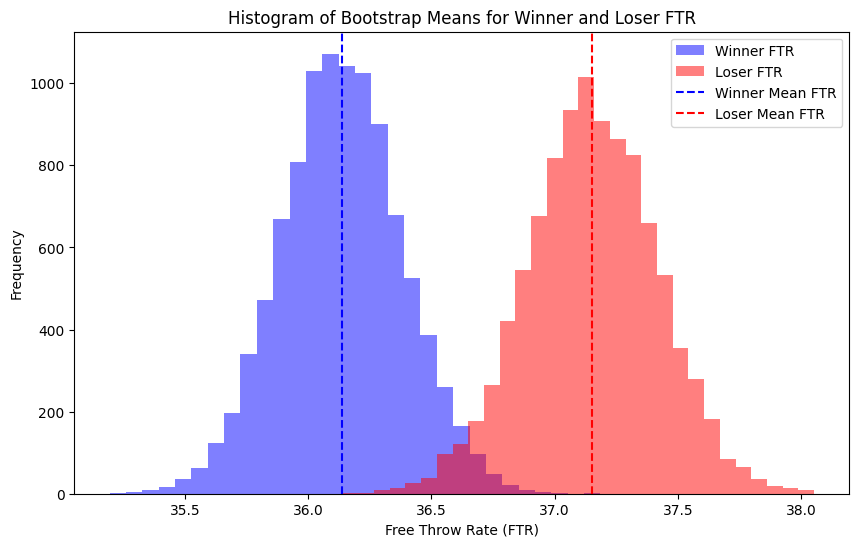

Winner FTR Mean CI: [35.65770312 36.61875521]
Loser FTR Mean CI: [36.6301875  37.66146875]


In [68]:
# Assuming bootstrap_mean is a function defined elsewhere for performing bootstrapping
winner_means_ftr = bootstrap_mean(winner['FTR'])
loser_means_ftr = bootstrap_mean(loser['FTR'])

# Confidence intervals for FTR
winner_ci_ftr = np.percentile(winner_means_ftr, [2.5, 97.5])
loser_ci_ftr = np.percentile(loser_means_ftr, [2.5, 97.5])

# Plotting for FTR
plt.figure(figsize=(10, 6))
plt.hist(winner_means_ftr, bins=30, alpha=0.5, label='Winner FTR', color='blue')
plt.hist(loser_means_ftr, bins=30, alpha=0.5, label='Loser FTR', color='red')
plt.axvline(np.mean(winner_means_ftr), color='blue', linestyle='--', label='Winner Mean FTR')
plt.axvline(np.mean(loser_means_ftr), color='red', linestyle='--', label='Loser Mean FTR')
plt.title('Histogram of Bootstrap Means for Winner and Loser FTR')
plt.xlabel('Free Throw Rate (FTR)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for FTR
print('Winner FTR Mean CI:', winner_ci_ftr)
print('Loser FTR Mean CI:', loser_ci_ftr)


### Hypothesis Testing FTR

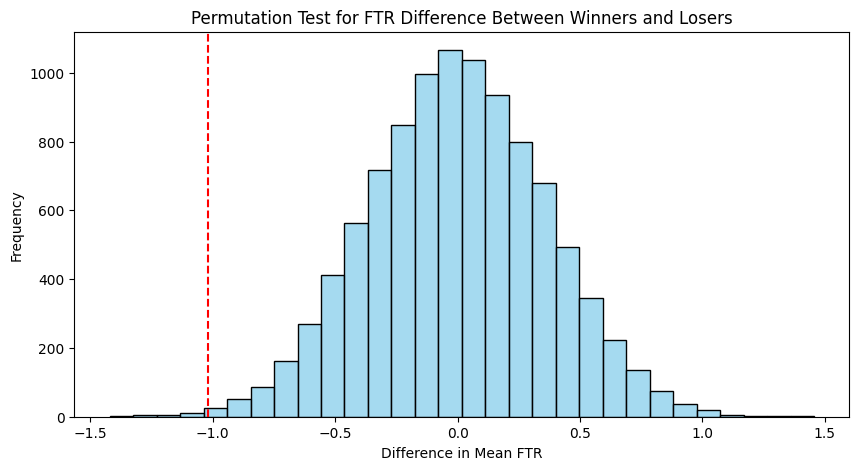

Observed difference in mean FTR: -1.0193749999999895
P-value: 0.9978


In [69]:
# Separate winners and losers based on 'Is_32' flag for FTR
winners_ftr = data[data['Is_32'] == 1]['FTR']
losers_ftr = data[data['Is_32'] == 0]['FTR']

# Calculate the observed difference in FTR
observed_diff_ftr = np.mean(winners_ftr) - np.mean(losers_ftr)

# Combine FTR values from both winners and losers for permutation
combined_ftr = pd.concat([winners_ftr, losers_ftr])

# Initialize list to hold permutation differences for FTR
perm_diffs_ftr = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined FTR values
    shuffled_ftr = combined_ftr.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_ftr = shuffled_ftr[:len(winners_ftr)]
    shuffled_losers_ftr = shuffled_ftr[len(winners_ftr):]
    
    # Calculate the difference in mean FTR for this permutation
    perm_diff_ftr = np.mean(shuffled_winners_ftr) - np.mean(shuffled_losers_ftr)
    
    # Append the difference to the list
    perm_diffs_ftr.append(perm_diff_ftr)

# Calculate the p-value based on the observed difference for FTR
p_value_ftr = (np.sum(perm_diffs_ftr >= observed_diff_ftr) / n_permutations)

# Plot the results for FTR
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_ftr, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_ftr, color='red', linestyle='--')
plt.title('Permutation Test for FTR Difference Between Winners and Losers')
plt.xlabel('Difference in Mean FTR')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for FTR
print('Observed difference in mean FTR:', observed_diff_ftr)
print('P-value:', p_value_ftr)


### Bootstrap FTRD

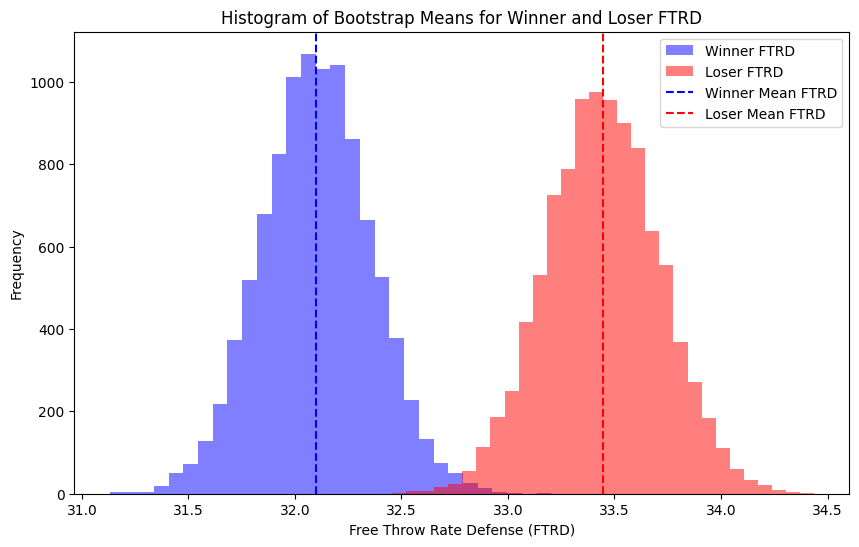

Winner FTRD Mean CI: [31.60061458 32.60000521]
Loser FTRD Mean CI: [32.92872917 33.97020833]


In [70]:
# Assuming bootstrap_mean is a function defined elsewhere for performing bootstrapping
winner_means_ftrd = bootstrap_mean(winner['FTRD'])
loser_means_ftrd = bootstrap_mean(loser['FTRD'])

# Confidence intervals for FTRD
winner_ci_ftrd = np.percentile(winner_means_ftrd, [2.5, 97.5])
loser_ci_ftrd = np.percentile(loser_means_ftrd, [2.5, 97.5])

# Plotting for FTRD
plt.figure(figsize=(10, 6))
plt.hist(winner_means_ftrd, bins=30, alpha=0.5, label='Winner FTRD', color='blue')
plt.hist(loser_means_ftrd, bins=30, alpha=0.5, label='Loser FTRD', color='red')
plt.axvline(np.mean(winner_means_ftrd), color='blue', linestyle='--', label='Winner Mean FTRD')
plt.axvline(np.mean(loser_means_ftrd), color='red', linestyle='--', label='Loser Mean FTRD')
plt.title('Histogram of Bootstrap Means for Winner and Loser FTRD')
plt.xlabel('Free Throw Rate Defense (FTRD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for FTRD
print('Winner FTRD Mean CI:', winner_ci_ftrd)
print('Loser FTRD Mean CI:', loser_ci_ftrd)


### Hypothesis Testing FTRD

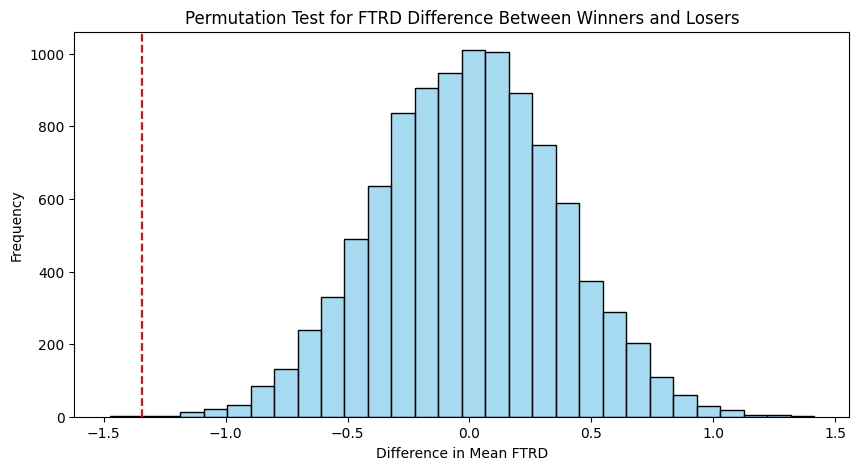

Observed difference in mean FTRD: -1.345208333333332
P-value: 0.0002


In [71]:
# Separate winners and losers based on 'Is_32' flag for FTRD
winners_ftrd = data[data['Is_32'] == 1]['FTRD']
losers_ftrd = data[data['Is_32'] == 0]['FTRD']

# Calculate the observed difference in FTRD
observed_diff_ftrd = np.mean(winners_ftrd) - np.mean(losers_ftrd)

# Combine FTRD values from both winners and losers for permutation
combined_ftrd = pd.concat([winners_ftrd, losers_ftrd])

# Initialize list to hold permutation differences for FTRD
perm_diffs_ftrd = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined FTRD values
    shuffled_ftrd = combined_ftrd.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_ftrd = shuffled_ftrd[:len(winners_ftrd)]
    shuffled_losers_ftrd = shuffled_ftrd[len(winners_ftrd):]
    
    # Calculate the difference in mean FTRD for this permutation
    perm_diff_ftrd = np.mean(shuffled_winners_ftrd) - np.mean(shuffled_losers_ftrd)
    
    # Append the difference to the list
    perm_diffs_ftrd.append(perm_diff_ftrd)

# Calculate the p-value based on the observed difference for FTRD
p_value_ftrd = (np.sum(perm_diffs_ftrd <= observed_diff_ftrd) / n_permutations)

# Plot the results for FTRD
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_ftrd, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_ftrd, color='red', linestyle='--')
plt.title('Permutation Test for FTRD Difference Between Winners and Losers')
plt.xlabel('Difference in Mean FTRD')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for FTRD
print('Observed difference in mean FTRD:', observed_diff_ftrd)
print('P-value:', p_value_ftrd)


### Bootstrap ADJ T.

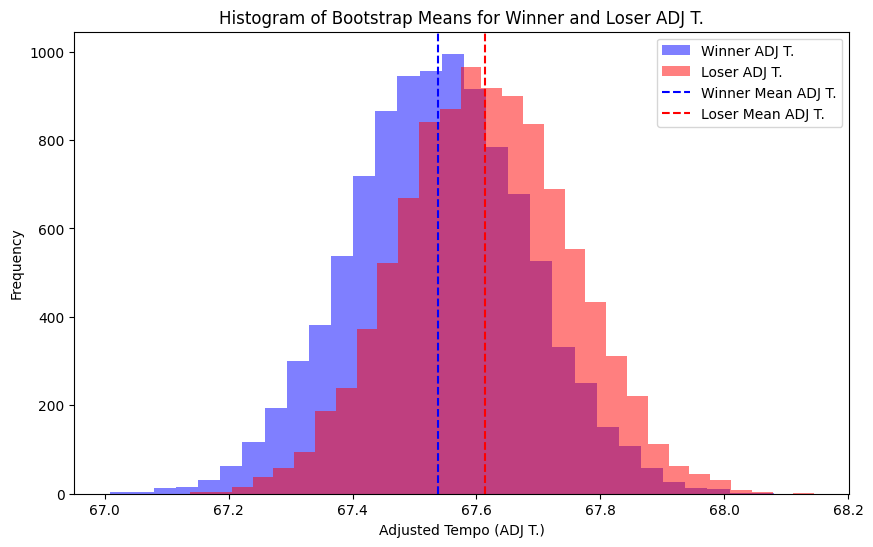

Winner ADJ T. Mean CI: [67.25894271 67.81958854]
Loser ADJ T. Mean CI: [67.34748958 67.87938021]


In [72]:
# Assuming bootstrap_mean is a function defined elsewhere for performing bootstrapping
winner_means_adjt = bootstrap_mean(winner['ADJ T.'])
loser_means_adjt = bootstrap_mean(loser['ADJ T.'])

# Confidence intervals for ADJ T.
winner_ci_adjt = np.percentile(winner_means_adjt, [2.5, 97.5])
loser_ci_adjt = np.percentile(loser_means_adjt, [2.5, 97.5])

# Plotting for ADJ T.
plt.figure(figsize=(10, 6))
plt.hist(winner_means_adjt, bins=30, alpha=0.5, label='Winner ADJ T.', color='blue')
plt.hist(loser_means_adjt, bins=30, alpha=0.5, label='Loser ADJ T.', color='red')
plt.axvline(np.mean(winner_means_adjt), color='blue', linestyle='--', label='Winner Mean ADJ T.')
plt.axvline(np.mean(loser_means_adjt), color='red', linestyle='--', label='Loser Mean ADJ T.')
plt.title('Histogram of Bootstrap Means for Winner and Loser ADJ T.')
plt.xlabel('Adjusted Tempo (ADJ T.)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for ADJ T.
print('Winner ADJ T. Mean CI:', winner_ci_adjt)
print('Loser ADJ T. Mean CI:', loser_ci_adjt)


### Two Tailed Hypothesis Test

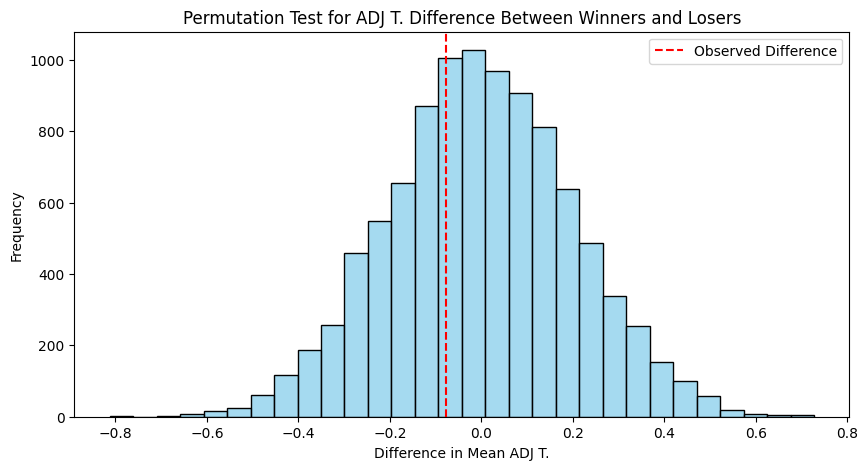

Observed difference in mean ADJ T.: -0.0762499999999875
Two-tailed P-value: 0.7019


In [73]:
# Separate winners and losers based on 'Is_32' flag for ADJ T.
winners_adjt = data[data['Is_32'] == 1]['ADJ T.']
losers_adjt = data[data['Is_32'] == 0]['ADJ T.']

# Calculate the observed difference in ADJ T.
observed_diff_adjt = np.mean(winners_adjt) - np.mean(losers_adjt)

# Combine ADJ T. values from both winners and losers for permutation
combined_adjt = pd.concat([winners_adjt, losers_adjt])

# Initialize list to hold permutation differences for ADJ T.
perm_diffs_adjt = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined ADJ T. values
    shuffled_adjt = combined_adjt.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_adjt = shuffled_adjt[:len(winners_adjt)]
    shuffled_losers_adjt = shuffled_adjt[len(winners_adjt):]
    
    # Calculate the difference in mean ADJ T. for this permutation
    perm_diff_adjt = np.mean(shuffled_winners_adjt) - np.mean(shuffled_losers_adjt)
    
    # Append the difference to the list
    perm_diffs_adjt.append(perm_diff_adjt)

# Calculate the two-tailed p-value based on the observed difference for ADJ T.
# Count how many permuted differences are as extreme or more extreme than the observed difference
more_extreme = np.sum(np.abs(perm_diffs_adjt) >= np.abs(observed_diff_adjt))
p_value_adjt = more_extreme / n_permutations

# Plot the results for ADJ T.
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_adjt, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_adjt, color='red', linestyle='--', label='Observed Difference')
plt.title('Permutation Test for ADJ T. Difference Between Winners and Losers')
plt.xlabel('Difference in Mean ADJ T.')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print observed difference and two-tailed p-value for ADJ T.
print('Observed difference in mean ADJ T.:', observed_diff_adjt)
print('Two-tailed P-value:', p_value_adjt)


### Bootstrap W%

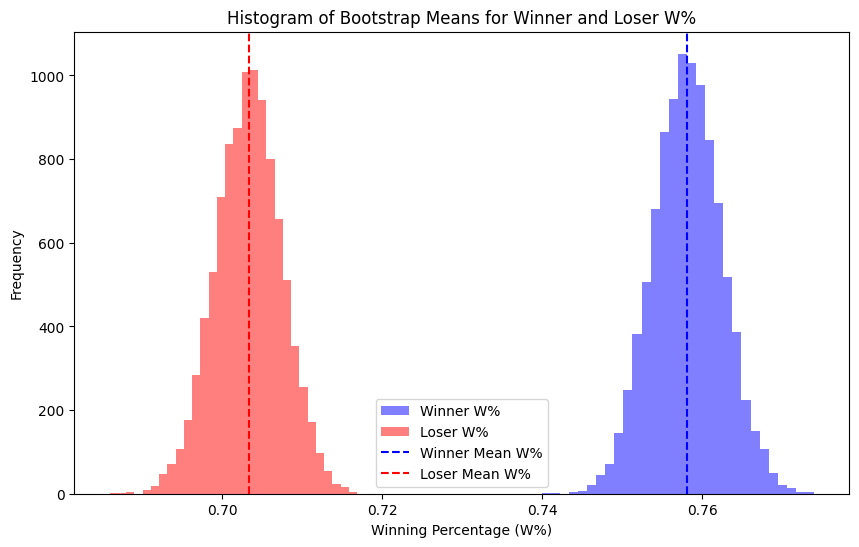

Winner W% Mean CI: [0.74985802 0.76665839]
Loser W% Mean CI: [0.69517078 0.71141042]


In [78]:
# Assuming bootstrap_mean is a function defined elsewhere for performing bootstrapping
winner_means_wp = bootstrap_mean(winner['W%'])
loser_means_wp = bootstrap_mean(loser['W%'])

# Confidence intervals for W%
winner_ci_wp = np.percentile(winner_means_wp, [2.5, 97.5])
loser_ci_wp = np.percentile(loser_means_wp, [2.5, 97.5])

# Plotting for W%
plt.figure(figsize=(10, 6))
plt.hist(winner_means_wp, bins=30, alpha=0.5, label='Winner W%', color='blue')
plt.hist(loser_means_wp, bins=30, alpha=0.5, label='Loser W%', color='red')
plt.axvline(np.mean(winner_means_wp), color='blue', linestyle='--', label='Winner Mean W%')
plt.axvline(np.mean(loser_means_wp), color='red', linestyle='--', label='Loser Mean W%')
plt.title('Histogram of Bootstrap Means for Winner and Loser W%')
plt.xlabel('Winning Percentage (W%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for W%
print('Winner W% Mean CI:', winner_ci_wp)
print('Loser W% Mean CI:', loser_ci_wp)


### Hypothesis Testing W%

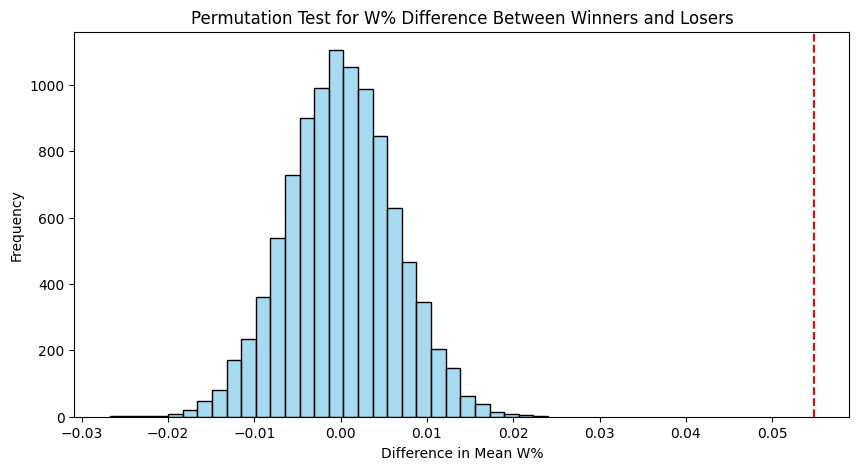

Observed difference in mean W%: 0.054860416666666745
P-value: 0.0


In [80]:
# Separate winners and losers based on 'Is_32' flag for W%
winners_wp = data[data['Is_32'] == 1]['W%']
losers_wp = data[data['Is_32'] == 0]['W%']

# Calculate the observed difference in W%
observed_diff_wp = np.mean(winners_wp) - np.mean(losers_wp)

# Combine W% values from both winners and losers for permutation
combined_wp = pd.concat([winners_wp, losers_wp])

# Initialize list to hold permutation differences for W%
perm_diffs_wp = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined W% values
    shuffled_wp = combined_wp.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_wp = shuffled_wp[:len(winners_wp)]
    shuffled_losers_wp = shuffled_wp[len(winners_wp):]
    
    # Calculate the difference in mean W% for this permutation
    perm_diff_wp = np.mean(shuffled_winners_wp) - np.mean(shuffled_losers_wp)
    
    # Append the difference to the list
    perm_diffs_wp.append(perm_diff_wp)

# Calculate the p-value based on the observed difference for W%
p_value_wp = (np.sum(perm_diffs_wp >= observed_diff_wp) / n_permutations)

# Plot the results for W%
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_wp, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_wp, color='red', linestyle='--')
plt.title('Permutation Test for W% Difference Between Winners and Losers')
plt.xlabel('Difference in Mean W%')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for W%
print('Observed difference in mean W%:', observed_diff_wp)
print('P-value:', p_value_wp)


### Bootstrap WAB

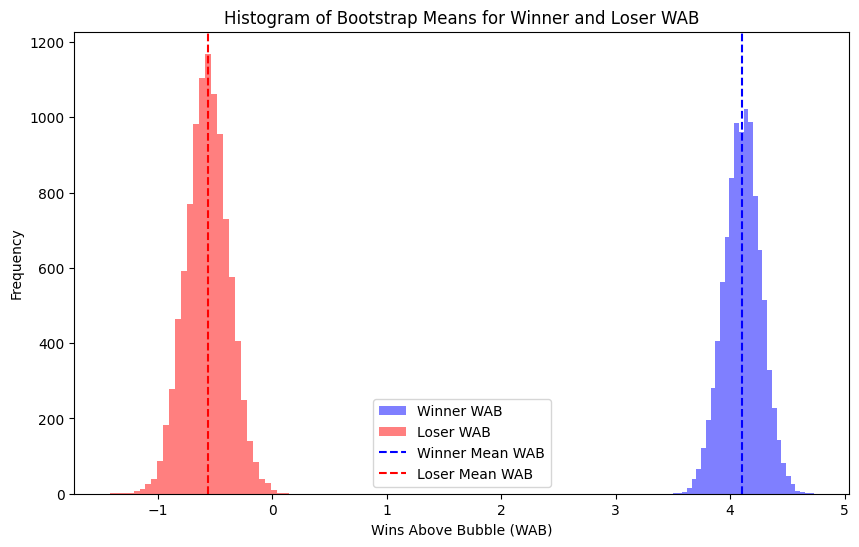

Winner WAB Mean CI: [3.78833333 4.41980208]
Loser WAB Mean CI: [-0.92583854 -0.20206771]


In [81]:
# Assuming bootstrap_mean is a function defined elsewhere for performing bootstrapping
winner_means_wab = bootstrap_mean(winner['WAB'])
loser_means_wab = bootstrap_mean(loser['WAB'])

# Confidence intervals for WAB
winner_ci_wab = np.percentile(winner_means_wab, [2.5, 97.5])
loser_ci_wab = np.percentile(loser_means_wab, [2.5, 97.5])

# Plotting for WAB
plt.figure(figsize=(10, 6))
plt.hist(winner_means_wab, bins=30, alpha=0.5, label='Winner WAB', color='blue')
plt.hist(loser_means_wab, bins=30, alpha=0.5, label='Loser WAB', color='red')
plt.axvline(np.mean(winner_means_wab), color='blue', linestyle='--', label='Winner Mean WAB')
plt.axvline(np.mean(loser_means_wab), color='red', linestyle='--', label='Loser Mean WAB')
plt.title('Histogram of Bootstrap Means for Winner and Loser WAB')
plt.xlabel('Wins Above Bubble (WAB)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for WAB
print('Winner WAB Mean CI:', winner_ci_wab)
print('Loser WAB Mean CI:', loser_ci_wab)


### Hypothesis Testing WAB

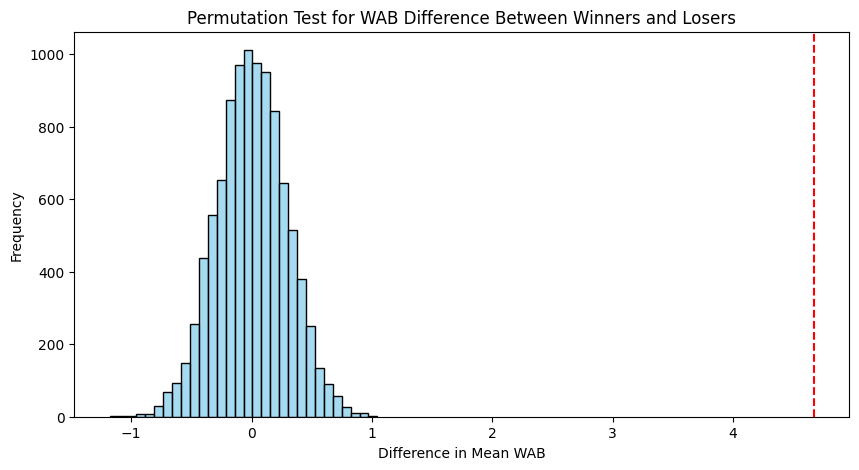

Observed difference in mean WAB: 4.673125000000001
P-value: 0.0


In [83]:
# Separate winners and losers based on 'Is_32' flag for WAB
winners_wab = data[data['Is_32'] == 1]['WAB']
losers_wab = data[data['Is_32'] == 0]['WAB']

# Calculate the observed difference in WAB
observed_diff_wab = np.mean(winners_wab) - np.mean(losers_wab)

# Combine WAB values from both winners and losers for permutation
combined_wab = pd.concat([winners_wab, losers_wab])

# Initialize list to hold permutation differences for WAB
perm_diffs_wab = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined WAB values
    shuffled_wab = combined_wab.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_wab = shuffled_wab[:len(winners_wab)]
    shuffled_losers_wab = shuffled_wab[len(winners_wab):]
    
    # Calculate the difference in mean WAB for this permutation
    perm_diff_wab = np.mean(shuffled_winners_wab) - np.mean(shuffled_losers_wab)
    
    # Append the difference to the list
    perm_diffs_wab.append(perm_diff_wab)

# Calculate the p-value based on the observed difference for WAB
p_value_wab = (np.sum(perm_diffs_wab >= observed_diff_wab) / n_permutations)

# Plot the results for WAB
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_wab, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_wab, color='red', linestyle='--')
plt.title('Permutation Test for WAB Difference Between Winners and Losers')
plt.xlabel('Difference in Mean WAB')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for WAB
print('Observed difference in mean WAB:', observed_diff_wab)
print('P-value:', p_value_wab)


### Bootstrap ORB

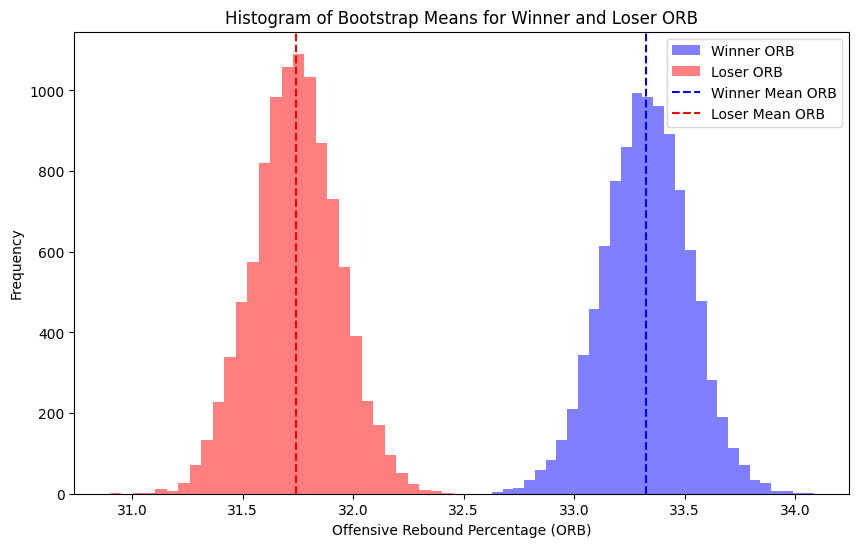

Winner ORB Mean CI: [32.93728125 33.70188542]
Loser ORB Mean CI: [31.36270312 32.12397917]


In [84]:
# Assuming bootstrap_mean is a function defined elsewhere for performing bootstrapping
winner_means_orb = bootstrap_mean(winner['ORB'])
loser_means_orb = bootstrap_mean(loser['ORB'])

# Confidence intervals for ORB
winner_ci_orb = np.percentile(winner_means_orb, [2.5, 97.5])
loser_ci_orb = np.percentile(loser_means_orb, [2.5, 97.5])

# Plotting for ORB
plt.figure(figsize=(10, 6))
plt.hist(winner_means_orb, bins=30, alpha=0.5, label='Winner ORB', color='blue')
plt.hist(loser_means_orb, bins=30, alpha=0.5, label='Loser ORB', color='red')
plt.axvline(np.mean(winner_means_orb), color='blue', linestyle='--', label='Winner Mean ORB')
plt.axvline(np.mean(loser_means_orb), color='red', linestyle='--', label='Loser Mean ORB')
plt.title('Histogram of Bootstrap Means for Winner and Loser ORB')
plt.xlabel('Offensive Rebound Rate (ORB)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for ORB
print('Winner ORB Mean CI:', winner_ci_orb)
print('Loser ORB Mean CI:', loser_ci_orb)


### Hypothesis Testing ORB

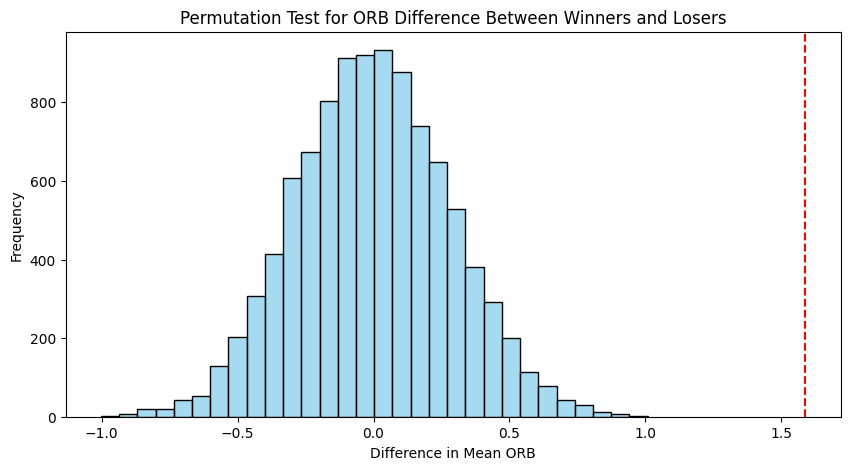

Observed difference in mean ORB: 1.5887500000000045
P-value: 0.0


In [86]:
# Separate winners and losers based on 'Is_32' flag for ORB
winners_orb = data[data['Is_32'] == 1]['ORB']
losers_orb = data[data['Is_32'] == 0]['ORB']

# Calculate the observed difference in ORB
observed_diff_orb = np.mean(winners_orb) - np.mean(losers_orb)

# Combine ORB values from both winners and losers for permutation
combined_orb = pd.concat([winners_orb, losers_orb])

# Initialize list to hold permutation differences for ORB
perm_diffs_orb = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined ORB values
    shuffled_orb = combined_orb.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_orb = shuffled_orb[:len(winners_orb)]
    shuffled_losers_orb = shuffled_orb[len(winners_orb):]
    
    # Calculate the difference in mean ORB for this permutation
    perm_diff_orb = np.mean(shuffled_winners_orb) - np.mean(shuffled_losers_orb)
    
    # Append the difference to the list
    perm_diffs_orb.append(perm_diff_orb)

# Calculate the p-value based on the observed difference for ORB
p_value_orb = (np.sum(perm_diffs_orb >= observed_diff_orb) / n_permutations)

# Plot the results for ORB
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_orb, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_orb, color='red', linestyle='--')
plt.title('Permutation Test for ORB Difference Between Winners and Losers')
plt.xlabel('Difference in Mean ORB')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for ORB
print('Observed difference in mean ORB:', observed_diff_orb)
print('P-value:', p_value_orb)


### Bootstrap DRB

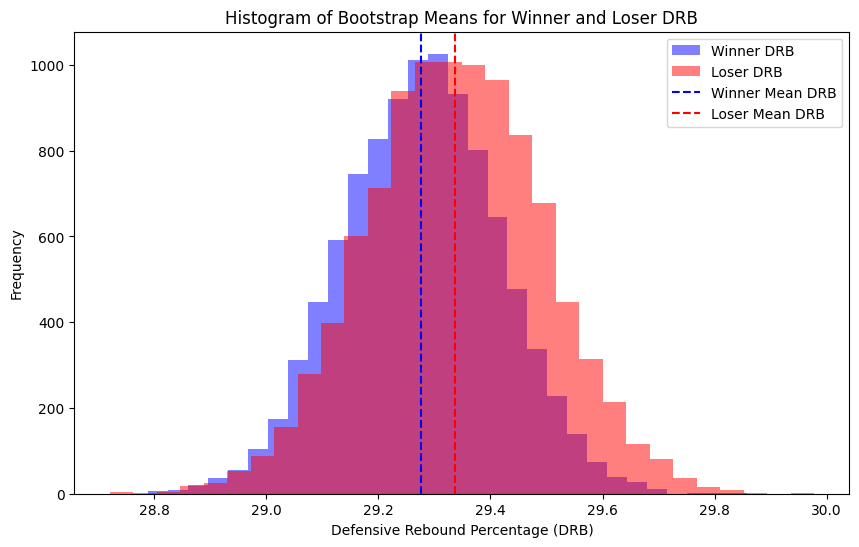

Winner DRB Mean CI: [29.00791146 29.54583333]
Loser DRB Mean CI: [29.03332292 29.64500521]


In [87]:
# Assuming bootstrap_mean is a function defined elsewhere for performing bootstrapping
winner_means_drb = bootstrap_mean(winner['DRB'])
loser_means_drb = bootstrap_mean(loser['DRB'])

# Confidence intervals for DRB
winner_ci_drb = np.percentile(winner_means_drb, [2.5, 97.5])
loser_ci_drb = np.percentile(loser_means_drb, [2.5, 97.5])

# Plotting for DRB
plt.figure(figsize=(10, 6))
plt.hist(winner_means_drb, bins=30, alpha=0.5, label='Winner DRB', color='blue')
plt.hist(loser_means_drb, bins=30, alpha=0.5, label='Loser DRB', color='red')
plt.axvline(np.mean(winner_means_drb), color='blue', linestyle='--', label='Winner Mean DRB')
plt.axvline(np.mean(loser_means_drb), color='red', linestyle='--', label='Loser Mean DRB')
plt.title('Histogram of Bootstrap Means for Winner and Loser DRB')
plt.xlabel('Offensive Rebound Rate Allowed (DRB)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outputting the confidence intervals for DRB
print('Winner DRB Mean CI:', winner_ci_drb)
print('Loser DRB Mean CI:', loser_ci_drb)


### Hypothesis Testing DRB

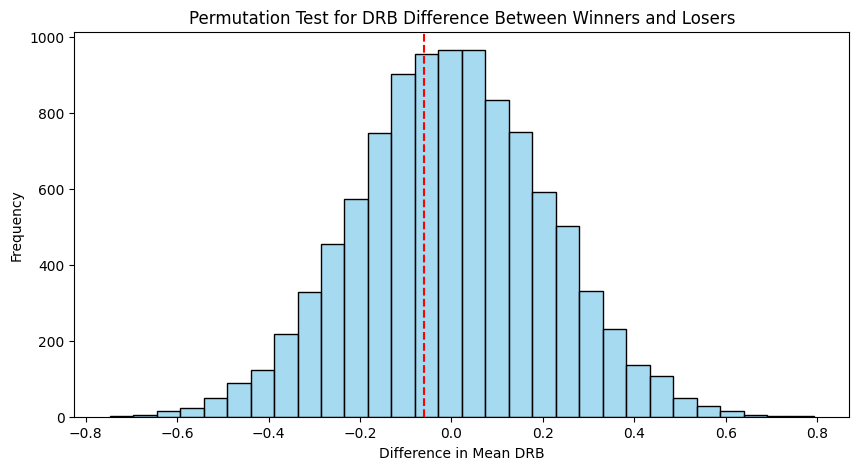

Observed difference in mean DRB: -0.059583333333335986
P-value: 0.3899


In [88]:
# Separate winners and losers based on 'Is_32' flag for DRB
winners_drb = data[data['Is_32'] == 1]['DRB']
losers_drb = data[data['Is_32'] == 0]['DRB']

# Calculate the observed difference in DRB
observed_diff_drb = np.mean(winners_drb) - np.mean(losers_drb)

# Combine DRB values from both winners and losers for permutation
combined_drb = pd.concat([winners_drb, losers_drb])

# Initialize list to hold permutation differences for DRB
perm_diffs_drb = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined DRB values
    shuffled_drb = combined_drb.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_drb = shuffled_drb[:len(winners_drb)]
    shuffled_losers_drb = shuffled_drb[len(winners_drb):]
    
    # Calculate the difference in mean DRB for this permutation
    perm_diff_drb = np.mean(shuffled_winners_drb) - np.mean(shuffled_losers_drb)
    
    # Append the difference to the list
    perm_diffs_drb.append(perm_diff_drb)

# Calculate the p-value based on the observed difference for DRB
p_value_drb = (np.sum(perm_diffs_drb <= observed_diff_drb) / n_permutations)

# Plot the results for DRB
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_drb, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_drb, color='red', linestyle='--')
plt.title('Permutation Test for DRB Difference Between Winners and Losers')
plt.xlabel('Difference in Mean DRB')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value for DRB
print('Observed difference in mean DRB:', observed_diff_drb)
print('P-value:', p_value_drb)


In [74]:
import scipy.stats as stats


winners_seed = data[data['Is_32'] == 1]['SEED']
losers_seed = data[data['Is_32'] == 0]['SEED']

t_test_results = stats.ttest_ind(losers_seed.dropna(), winners_seed.dropna())

print('T-test Results:')
print('T-statistic:', t_test_results.statistic)
print('P-value:', t_test_results.pvalue)

T-test Results:
T-statistic: 19.586553854996517
P-value: 4.162816992618885e-72
